In [1]:
import osmnx as ox
import networkx as nx
import random
import math
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns

In [2]:
def smooth(y,w=17,o=1,d=2):
    from scipy.signal import savgol_filter
    nans = [float('nan') for i in range(0,d)] 
    y = nans + list(savgol_filter(y[d:],w,o))
    for i in range(0,len(y)):
        if y[i]<0:
            y[i] = 0
    return y

#### Fig-1: Comparison of growth patterns

##### Uber trips in NYC declines from March to July 2019 due to new minimum wage rule (https://www.businessinsider.com/uber-lyft-rides-decline-after-new-york-minimum-wage-2019-7?IR=T). Indeed, Uber needed to make more money to pay its drivers, so it increased the trip fares, this decreased the number of travellers and consequently the number of drivers.The next massive drop is because of Covid. 

In [3]:
# import data
nyc = pd.read_csv('data/Uber_NYC_2012-2022.csv')
nyc.date = nyc.apply(lambda row: pd.Timestamp(row.date), axis=1)
nyc.at[0,'date'] = pd.Timestamp('2012-07-01')

mi = pd.read_csv('data/Uber_Miami.csv')
mi.date = mi.apply(lambda row: pd.Timestamp(row.date), axis=1)

sea = pd.read_csv('data/Uber_Seattle.csv')
sea.date = sea.apply(lambda row: pd.Timestamp(row.date), axis=1)

ams = pd.read_csv('data/Uber_Ams_2016-2022.csv')
ams.date = ams.apply(lambda row: pd.Timestamp(row.date), axis=1)

arjan = pd.read_csv('data/Arjan_supply.csv')
arjan.date = arjan.apply(lambda row: pd.Timestamp(row.date), axis=1)

djavadian = pd.read_csv('data/Djavadian_supply.csv')
djavadian.date = djavadian.apply(lambda row: pd.Timestamp(row.date), axis=1)

ertz = pd.read_csv('data/Ertz_supply.csv')
ertz.date = ertz.apply(lambda row: pd.Timestamp(row.date), axis=1)

C:\Users\farno\AppData\Local\Temp/ipykernel_25456/1905389617.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels([0, '2x10\N{SUPERSCRIPT six}', '4x10\N{SUPERSCRIPT six}', '6x10\N{SUPERSCRIPT six}',


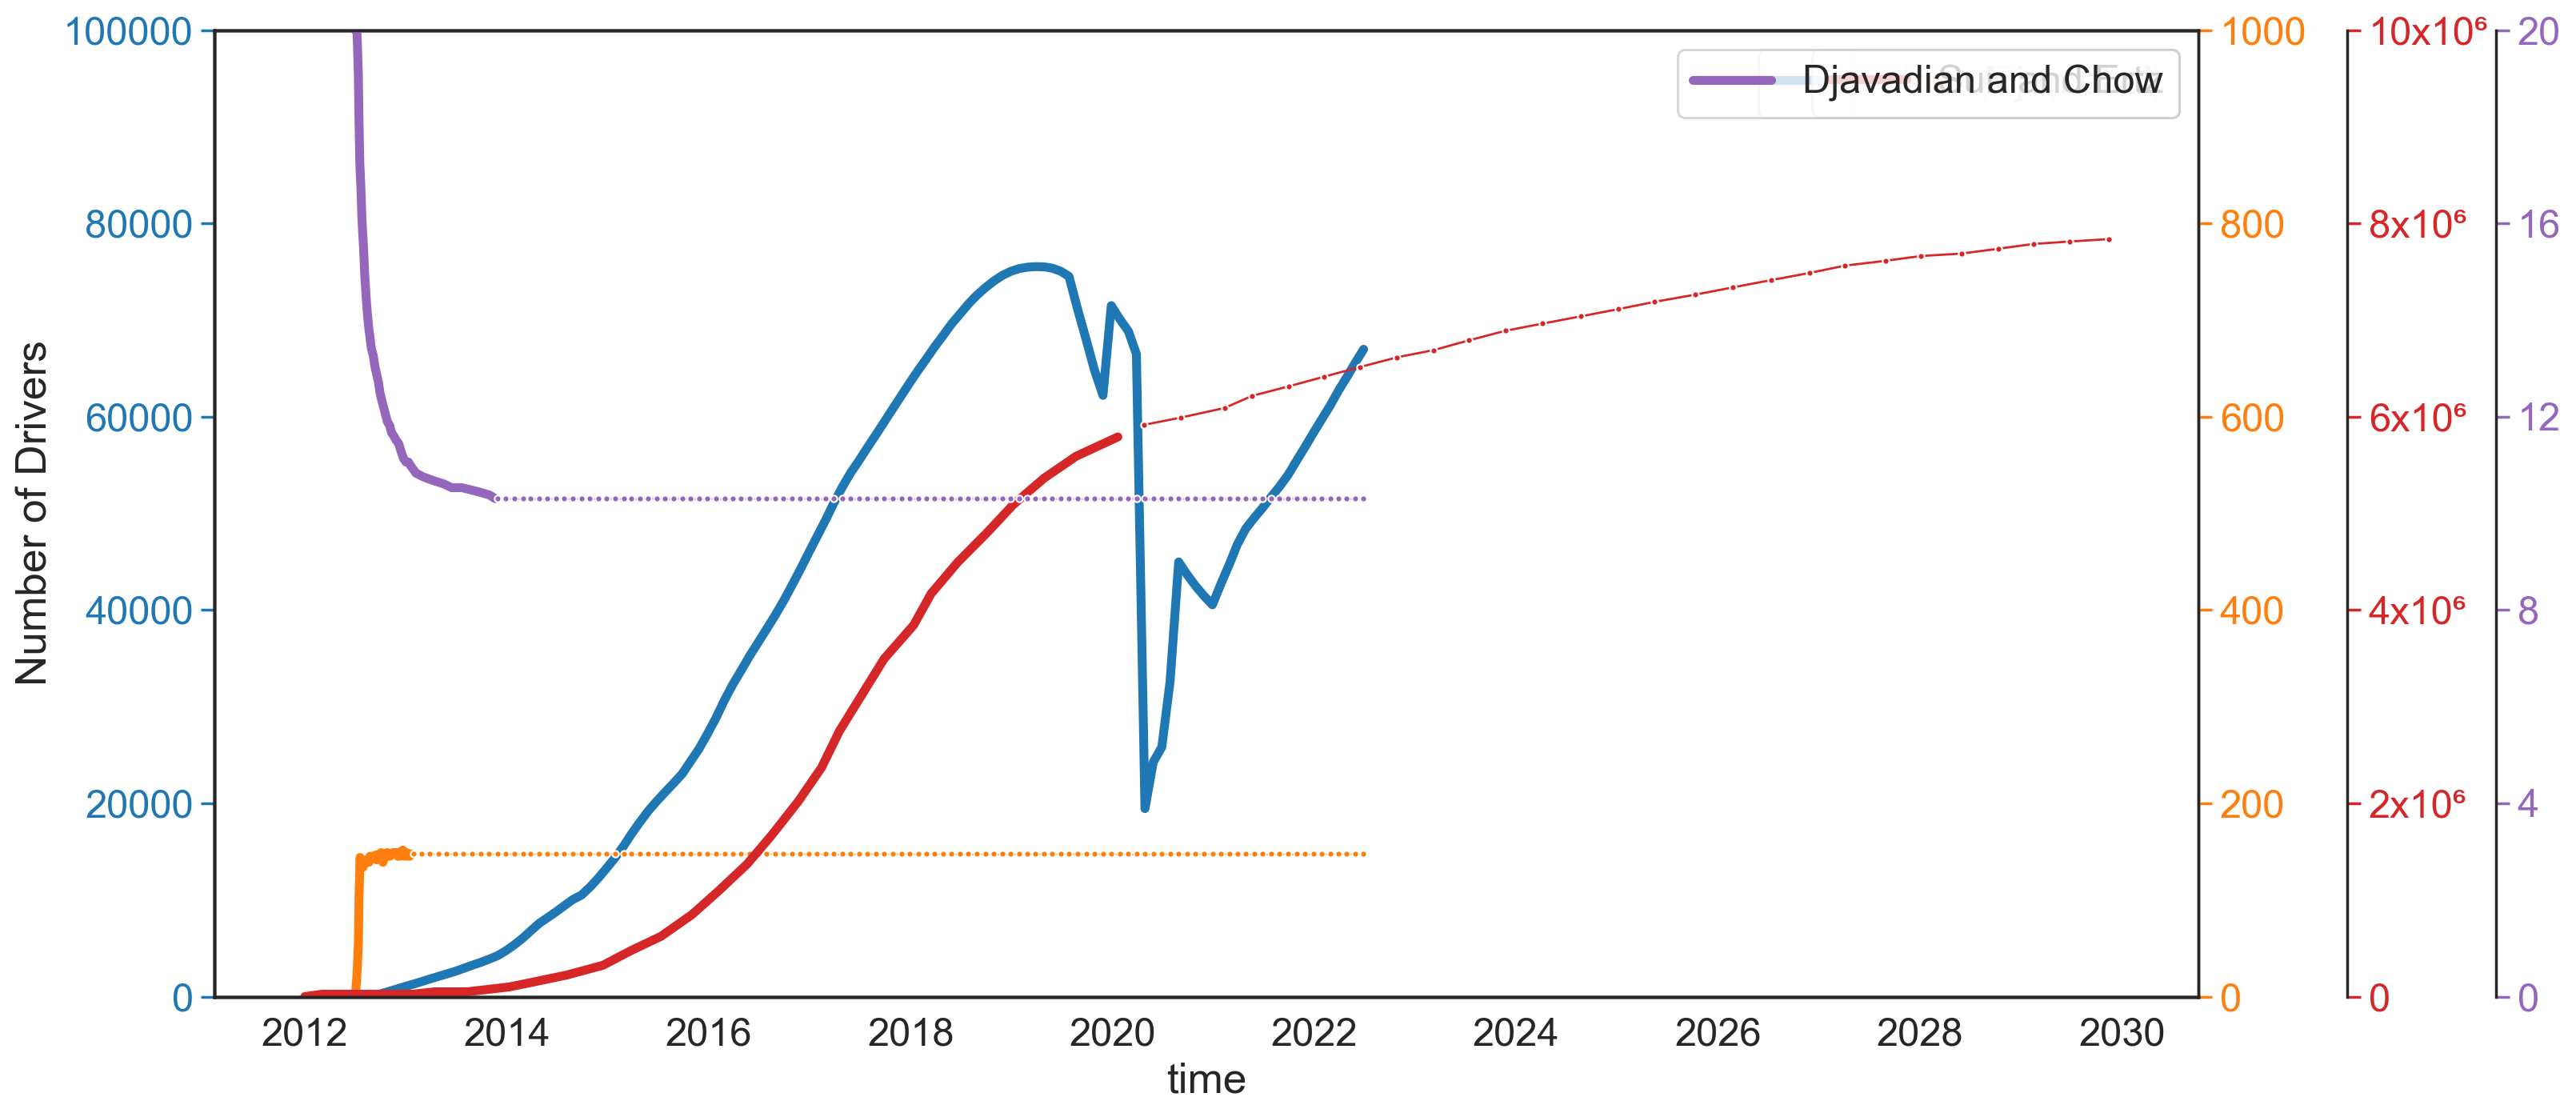

In [4]:
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set(palette='tab10',font_scale=1.6)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('white')
fig, ax = plt.subplots(nrows=1, figsize=(16,8))
# sns.despine(left=True)

#---------------------NYC-------------------------------------------
nyc_max = nyc['Unique Dispatched Vehicles'].max()
nyc_smoothed = smooth(nyc['Unique Dispatched Vehicles'])
nyc_y = nyc_smoothed[0:89]+list(nyc[89:97]['Unique Dispatched Vehicles'])+nyc_smoothed[97:]
# nyc_y = [0 if math.isnan(y) else y/nyc_max*100*0.7 for y in nyc_y]
nyc_y = [0 if math.isnan(y) else y for y in nyc_y]
# nyc_x = [x for x in range(1,len(nyc_y)+1)]
c1 = 'C0'
sns.lineplot(x=nyc.date, y=nyc_y,lw=4, label = 'NYC (Empirical)', color=c1)
ax.set(xlabel='time', ylabel='Number of Drivers', ylim=(0,100000))
ax.tick_params(axis='y', colors=c1)

#--------------------Arjan----------------------------------------------------
ax2 = ax.twinx()
c2 = 'C1'
sns.lineplot(x=arjan.date, y=arjan.number_of_drivers,lw=4, label = 'Arjan et al.', color=c2)
sns.lineplot(x=nyc.loc[6:].date, y=147.727,lw=1, color=c2, marker = '.')
ax2.set(xlabel='time',ylabel='', ylim=(0,1000))
ax2.tick_params(axis='y', colors=c2)
# ax11.grid(b=None)

#---------------------Ertz-------------------------------------------------
ax3 = ax.twinx()
c3 = 'C3'
sns.lineplot(x=ertz.loc[0:29].date, y=ertz.loc[0:29].number_of_drivers,lw=4, label = 'Sun and Ertz', color=c3)
sns.lineplot(x=ertz.loc[30:].date, y=ertz.loc[30:].number_of_drivers,lw=1, color=c3, marker = '.')
ax3.set(xlabel='time',ylabel='', ylim=(0,10))
ax3.spines.right.set_position(("axes", 1.075))
ax3.tick_params(axis='y', colors=c3)
ax3.set_yticklabels([0, '2x10\N{SUPERSCRIPT six}', '4x10\N{SUPERSCRIPT six}', '6x10\N{SUPERSCRIPT six}',
                     '8x10\N{SUPERSCRIPT six}', '10x10\N{SUPERSCRIPT six}'])

#---------------------Djavadian-------------------------------------------------
ax4 = ax.twinx()
c4 = 'C4'
sns.lineplot(x=djavadian.date, y=djavadian.number_of_drivers,lw=4, label = 'Djavadian and Chow', color=c4)
sns.lineplot(x=nyc.loc[16:].date, y=10.3030,lw=1, color=c4, marker = '.')
ax4.set(xlabel='time',ylabel='', ylim=(0,20))
ax4.spines.right.set_position(("axes", 1.15))
ax4.set_yticks([0,4,8,12,16,20])
ax4.tick_params(axis='y', colors=c4)
#--------------------------------------------------------------------------
# lines, labels = ax[1][1].get_legend_handles_labels()
# lines2, labels2 = ax11.get_legend_handles_labels()
# ax[1][1].legend(lines + lines2, labels + labels2,framealpha=1, loc=(0.73,0.6))
# ax11.legend().remove()
# ax2.spines['right'].set_color('C7')
# ax2.tick_params(axis='y', colors='C7')
# ax2.yaxis.label.set_color('C7')

# sns.despine(left=True)


In [ ]:
=======================================================================

In [4]:
nyc = nyc.loc[0:88]
ertz = ertz.loc[2:29]
ams = ams[:47]
# yms = pd.read_csv('data/dataframes/baseline_supply1.csv')
# yms = yms[0:360]

In [5]:
yms = [0.0,
 0.005,
 0.007,
 0.011,
 0.022,
 0.016,
 0.025,
 0.029,
 0.019,
 0.028,
 0.024,
 0.028,
 0.03,
 0.019,
 0.031,
 0.037,
 0.033,
 0.035,
 0.045,
 0.029,
 0.04,
 0.033,
 0.032,
 0.045,
 0.024,
 0.029,
 0.036,
 0.045,
 0.031,
 0.028,
 0.044,
 0.029,
 0.035,
 0.044,
 0.047,
 0.05,
 0.048,
 0.043,
 0.055,
 0.038,
 0.033,
 0.045,
 0.045,
 0.042,
 0.045,
 0.031,
 0.06,
 0.04,
 0.04,
 0.042,
 0.041,
 0.038,
 0.045,
 0.031,
 0.051,
 0.04,
 0.04,
 0.049,
 0.045,
 0.043,
 0.043,
 0.043,
 0.044,
 0.045,
 0.034,
 0.043,
 0.036,
 0.04,
 0.05,
 0.037,
 0.038,
 0.051,
 0.035,
 0.047,
 0.048,
 0.042,
 0.05,
 0.048,
 0.049,
 0.055,
 0.049,
 0.047,
 0.045,
 0.044,
 0.041,
 0.054,
 0.052,
 0.05,
 0.042,
 0.035,
 0.034,
 0.057,
 0.04,
 0.054,
 0.044,
 0.046,
 0.039,
 0.044,
 0.052,
 0.045,
 0.053,
 0.033,
 0.045,
 0.045,
 0.035,
 0.04,
 0.036,
 0.049,
 0.045,
 0.035,
 0.037,
 0.043,
 0.054,
 0.051,
 0.044,
 0.041,
 0.043,
 0.058,
 0.052,
 0.047,
 0.046,
 0.054,
 0.062,
 0.058,
 0.049,
 0.05,
 0.046,
 0.054,
 0.056,
 0.05,
 0.059,
 0.056,
 0.053,
 0.054,
 0.054,
 0.063,
 0.061,
 0.058,
 0.069,
 0.062,
 0.081,
 0.067,
 0.077,
 0.057,
 0.062,
 0.061,
 0.066,
 0.063,
 0.072,
 0.066,
 0.069,
 0.07,
 0.069,
 0.062,
 0.056,
 0.081,
 0.068,
 0.071,
 0.077,
 0.078,
 0.086,
 0.084,
 0.083,
 0.077,
 0.097,
 0.081,
 0.071,
 0.094,
 0.084,
 0.088,
 0.092,
 0.082,
 0.097,
 0.081,
 0.093,
 0.089,
 0.091,
 0.086,
 0.1,
 0.096,
 0.086,
 0.083,
 0.099,
 0.095,
 0.082,
 0.111,
 0.106,
 0.099,
 0.1,
 0.098,
 0.076,
 0.106,
 0.094,
 0.1,
 0.117,
 0.117,
 0.117,
 0.107,
 0.109,
 0.107,
 0.115,
 0.109,
 0.117,
 0.114,
 0.121,
 0.126,
 0.121,
 0.132,
 0.113,
 0.129,
 0.118,
 0.128,
 0.11,
 0.129,
 0.12,
 0.116,
 0.115,
 0.136,
 0.135,
 0.147,
 0.136,
 0.131,
 0.14,
 0.127,
 0.127,
 0.14,
 0.137,
 0.15,
 0.148,
 0.149,
 0.15,
 0.145,
 0.167,
 0.145,
 0.142,
 0.153,
 0.148,
 0.172,
 0.157,
 0.151,
 0.164,
 0.175,
 0.155,
 0.163,
 0.168,
 0.164,
 0.176,
 0.168,
 0.172,
 0.178,
 0.16,
 0.172,
 0.175,
 0.186,
 0.166,
 0.183,
 0.189,
 0.169,
 0.173,
 0.19,
 0.193,
 0.19,
 0.201,
 0.185,
 0.184,
 0.191,
 0.203,
 0.191,
 0.193,
 0.184,
 0.189,
 0.202,
 0.194,
 0.205,
 0.198,
 0.213,
 0.21,
 0.212,
 0.212,
 0.224,
 0.213,
 0.196,
 0.199,
 0.194,
 0.226,
 0.216,
 0.204,
 0.221,
 0.22,
 0.221,
 0.239,
 0.237,
 0.225,
 0.23,
 0.236,
 0.22,
 0.26,
 0.238,
 0.231,
 0.223,
 0.236,
 0.229,
 0.243,
 0.253,
 0.248,
 0.239,
 0.267,
 0.226,
 0.243,
 0.232,
 0.242,
 0.242,
 0.242,
 0.233,
 0.265,
 0.268,
 0.261,
 0.248,
 0.241,
 0.241,
 0.268,
 0.262,
 0.26,
 0.271,
 0.254,
 0.27,
 0.275,
 0.301,
 0.257,
 0.263,
 0.263,
 0.276,
 0.28,
 0.29,
 0.295,
 0.267,
 0.285,
 0.283,
 0.29,
 0.261,
 0.27,
 0.285,
 0.295,
 0.273,
 0.283,
 0.287,
 0.292,
 0.287,
 0.294,
 0.294,
 0.288,
 0.29,
 0.304,
 0.293,
 0.292,
 0.307,
 0.309,
 0.292,
 0.297,
 0.319]

In [6]:
import datetime

base = pd.Timestamp('2012-07-01')
n_days = 360
step = 7.6 #7.6
# calculating timestamps for the next 10 days
timestamp_list = [base + datetime.timedelta(days=step*x) for x in range(n_days)]
me = pd.DataFrame()
me['supply_share'] = yms#smooth(yms, w=11)
me['date'] = timestamp_list

In [47]:
ams['ms'] = ams.Number_of_trips/ams.Number_of_trips.max()
me['ms'] = me.supply_share/me.supply_share.max()
y_actual = []
y_predicted = []
for i in range(6,10):
    y_actual.append(ams.loc[(ams.date>pd.Timestamp('201{}-01-01'.format(i))) & (ams.date<pd.Timestamp('201{}-12-29'.format(i)))].ms.mean())
    y_predicted.append(me.loc[(me.date>pd.Timestamp('201{}-01-01'.format(i))) & (me.date<pd.Timestamp('201{}-12-01'.format(i)))].ms.mean())

MSE = np.square(np.subtract(y_actual,y_predicted)).mean() 
RMSE = math.sqrt(MSE)
print('RMSE = ', RMSE)

RMSE =  0.04501493506500213


C:\Users\farno\AppData\Local\Temp/ipykernel_3720/679274695.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aj_date = nyc.loc[6:].date; aj_date[6] = pd.Timestamp('2013-01-19')
C:\Users\farno\AppData\Local\Temp/ipykernel_3720/679274695.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dj_date = nyc.loc[16:].date; dj_date[16] = pd.Timestamp('2013-11-20')


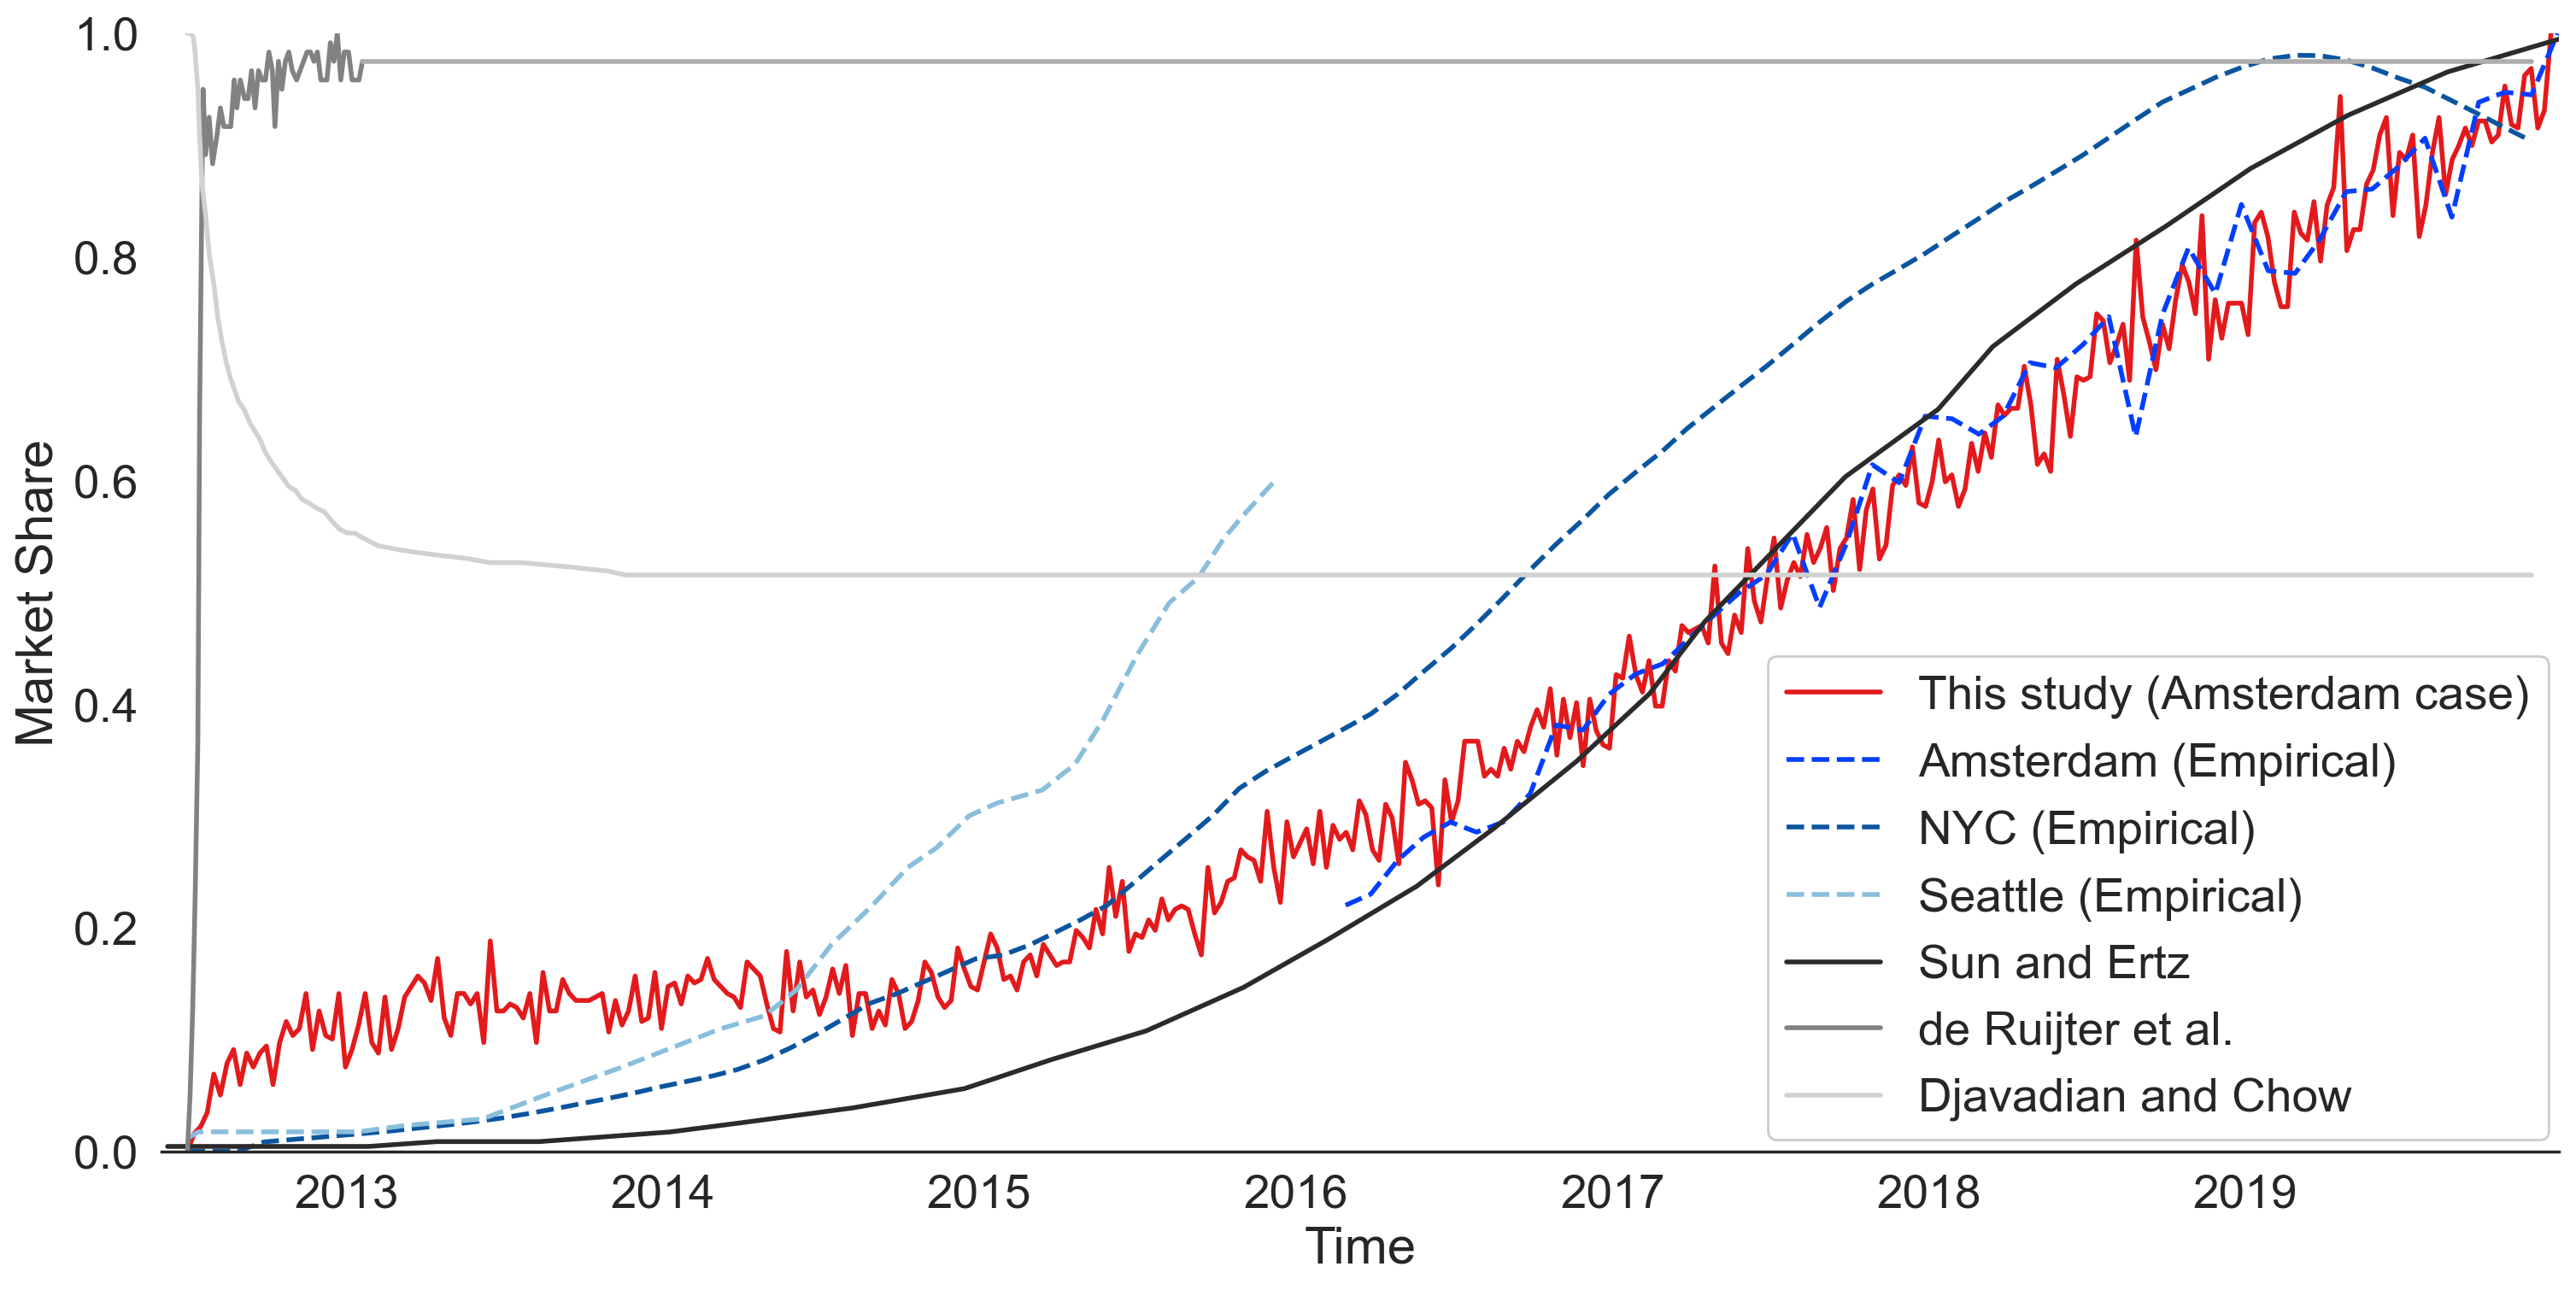

In [11]:
# Here we use min-max scaling or normalization: https://www.linkedin.com/advice/1/what-pros-cons-different-scaling-methods-data-normalization#:~:text=Data%20normalization%20and%20scaling%20can%20be%20achieved%20through%20several%20methods,dividing%20by%20the%20maximum%20value.

sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set(palette='tab10',font_scale=1.8)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('white')
fig, ax = plt.subplots(nrows=1, figsize=(16,8))
sns.despine(left=True)

bright = sns.color_palette("bright")
blues = sns.color_palette("Blues")
greys = sns.color_palette("Greys")
paired = sns.color_palette("Paired")
#Us-----------------------------------------------------------------------
me_max = me.supply_share.max()
me_last_v = me.supply_share[len(me)-1]
sns.lineplot(x=me.date, y=me.supply_share/me_max,lw=2, label = 'This study (Amsterdam case)', color=paired[5])

#Empirical-----------------------------------------------------------------------
ams_max = ams['Number_of_drivers'].max()
ams_y =ams['Number_of_drivers']# smooth(ams['Number_of_drivers'], w=9)
ams_y = [0 if math.isnan(y) else y/ams_max for y in ams_y]
ams_y[0] = 0.22; ams_y[1] = 0.23
sns.lineplot(x=ams.date, y=ams_y,lw=2, label = 'Amsterdam (Empirical)', color=bright[0], linestyle = 'dashed')

nyc_max = nyc['Unique Dispatched Vehicles'].max()
nyc_smoothed = smooth(nyc['Unique Dispatched Vehicles'], w=9)
nyc_y = nyc_smoothed[0:89]+list(nyc[89:97]['Unique Dispatched Vehicles'])+nyc_smoothed[97:]
nyc_y = [0 if math.isnan(y) else y/nyc_max for y in nyc_y]
# nyc_x = [x for x in range(1,len(nyc_y)+1)]
sns.lineplot(x=nyc.date, y=nyc_y,lw=2, label = 'NYC (Empirical)', color=blues[5], linestyle = 'dashed')

sea_max = sea.supply_share.max()
sns.lineplot(x=sea.date, y=0.6*sea.supply_share/sea_max,lw=2, label = 'Seattle (Empirical)', color=blues[2], linestyle = 'dashed')

#State-of-art-----------------------------------------------------------------------
ertz_max = ertz.supply_share.max()
ertz_last_v = ertz.supply_share[len(ertz)-1]
sns.lineplot(x=ertz.loc[0:29].date, y=ertz.loc[0:29].supply_share/ertz_max,lw=2, label = 'Sun and Ertz', color=greys[5], linestyle = 'solid')
# sns.lineplot(x=ertz.loc[30:].date, y=ertz.loc[30:].supply_share/ertz_max,lw=1, color='C2', marker = '.')

arjan_max = arjan.supply_share.max()
arjan_last_v = arjan.supply_share[len(arjan)-1]
sns.lineplot(x=arjan.date, y=arjan.supply_share/arjan_max, lw=2, label = 'de Ruijter et al.', color=greys[3], linestyle = 'solid')
aj_date = nyc.loc[6:].date; aj_date[6] = pd.Timestamp('2013-01-19')
sns.lineplot(x=aj_date, y=arjan_last_v/arjan_max, lw=2, color=greys[2], linestyle = 'solid')

djavadian_max = djavadian.supply_share.max()
djavadian_last_v = djavadian.supply_share[len(djavadian)-1]
sns.lineplot(x=djavadian.date, y=djavadian.supply_share/djavadian_max,lw=2, label = 'Djavadian and Chow', color=greys[1], linestyle = 'solid')
dj_date = nyc.loc[16:].date; dj_date[16] = pd.Timestamp('2013-11-20')
sns.lineplot(x=dj_date, y=djavadian_last_v/djavadian_max,lw=2, color=greys[1], linestyle = 'solid')

ax.set(xlabel='Time', ylabel='Market Share',xlim=(pd.Timestamp('2012-06-01 00:00:00')
,pd.Timestamp('2019-12-30 00:00:00')), ylim=(0,1))
# labels = ['Ghasemi and Kucharski','NYC (Empirical)', 'Amsterdam (Empirical)', 'Miami (Empirical)', 'Djavadian and Chow', 'Sun and Ertz']
ax.legend(frameon=True,framealpha=1, loc=(0.67,0.01))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)

plt.tight_layout()
# plt.savefig('Figs/new/1_comparison.png')

In [8]:
def smooth(y,w=41,o=1,d=5):
    from scipy.signal import savgol_filter
    nans = [float('nan') for i in range(0,d)] 
    y = nans + list(savgol_filter(y[d:],w,o))
    for i in range(0,len(y)):
        if y[i]<0:
            y[i] = 0
    return y

C:\Users\farno\AppData\Local\Temp/ipykernel_21640/1278384525.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aj_date = nyc.loc[6:].date; aj_date[6] = pd.Timestamp('2013-01-19')
C:\Users\farno\AppData\Local\Temp/ipykernel_21640/1278384525.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dj_date = nyc.loc[16:].date; dj_date[16] = pd.Timestamp('2013-11-20')


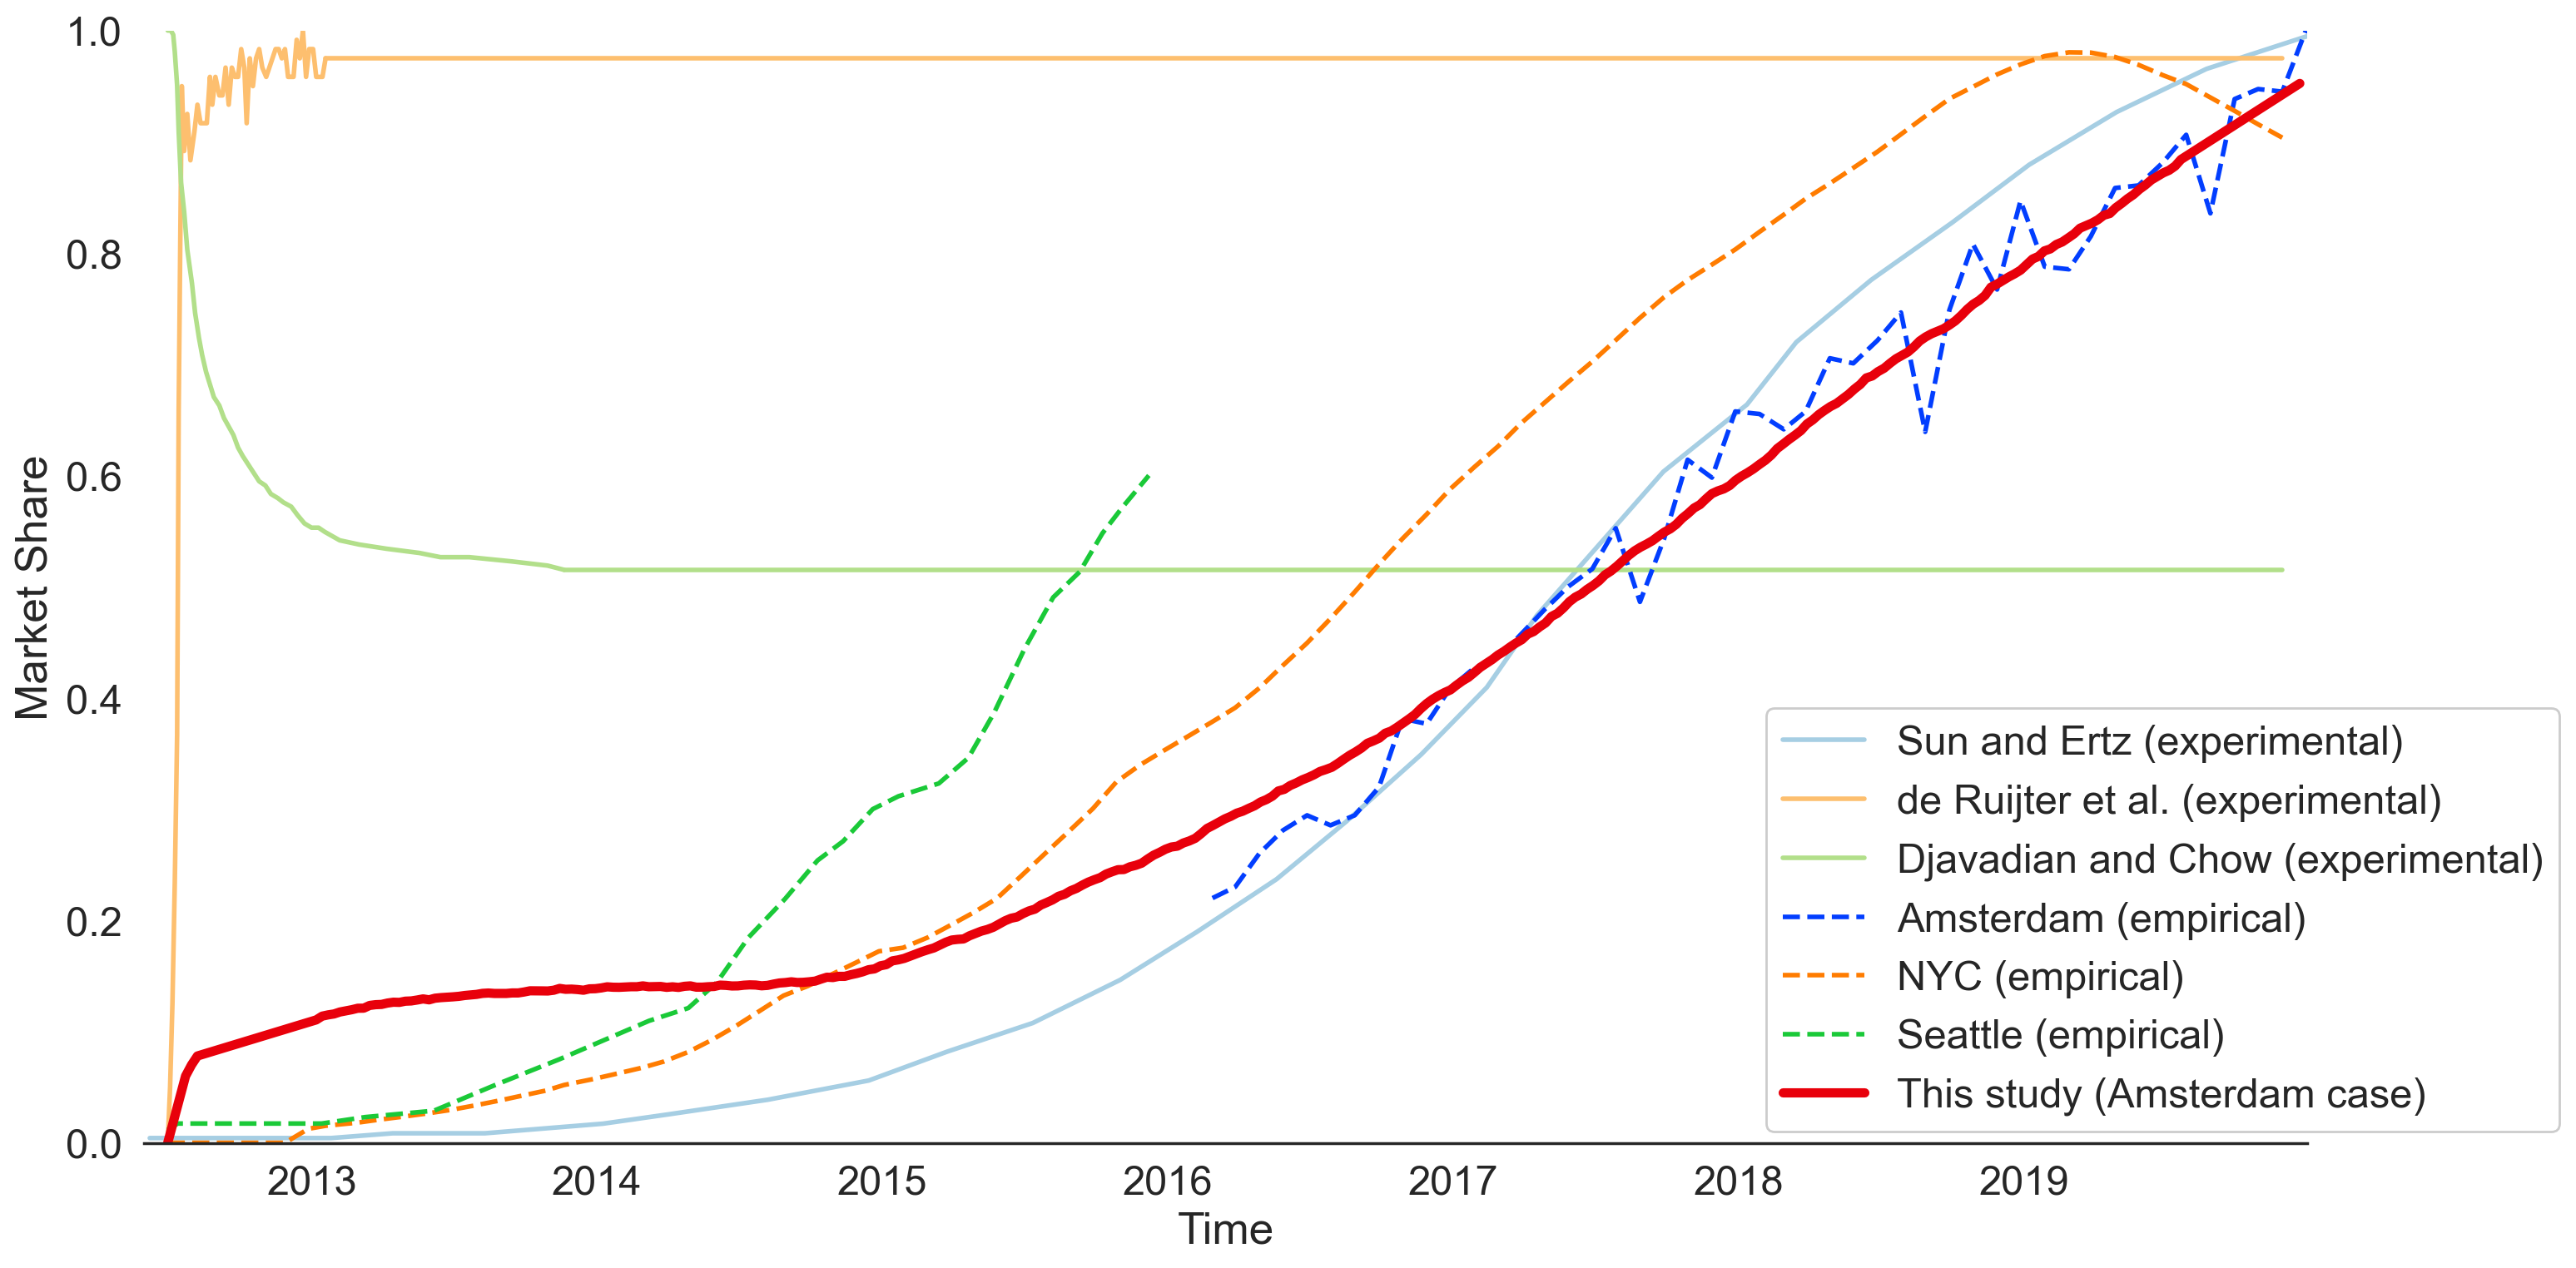

In [9]:
# Here we use min-max scaling or normalization: https://www.linkedin.com/advice/1/what-pros-cons-different-scaling-methods-data-normalization#:~:text=Data%20normalization%20and%20scaling%20can%20be%20achieved%20through%20several%20methods,dividing%20by%20the%20maximum%20value.

sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set(palette='tab10',font_scale=1.6)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('white')
fig, ax = plt.subplots(nrows=1, figsize=(16,8))
sns.despine(left=True)

bright = sns.color_palette("bright")
blues = sns.color_palette("Blues")
greys = sns.color_palette("Greys")
paired = sns.color_palette("Paired")
#State-of-art-----------------------------------------------------------------------
ertz_max = ertz.supply_share.max()
ertz_last_v = ertz.supply_share[len(ertz)-1]
sns.lineplot(x=ertz.loc[0:29].date, y=ertz.loc[0:29].supply_share/ertz_max,lw=2, label = 'Sun and Ertz (experimental)', color=paired[0], linestyle = 'solid')
# sns.lineplot(x=ertz.loc[30:].date, y=ertz.loc[30:].supply_share/ertz_max,lw=1, color='C2', marker = '.')

arjan_max = arjan.supply_share.max()
arjan_last_v = arjan.supply_share[len(arjan)-1]
sns.lineplot(x=arjan.date, y=arjan.supply_share/arjan_max, lw=2, label = 'de Ruijter et al. (experimental)', color=paired[6], linestyle = 'solid')
aj_date = nyc.loc[6:].date; aj_date[6] = pd.Timestamp('2013-01-19')
sns.lineplot(x=aj_date, y=arjan_last_v/arjan_max, lw=2, color=paired[6], linestyle = 'solid')

djavadian_max = djavadian.supply_share.max()
djavadian_last_v = djavadian.supply_share[len(djavadian)-1]
sns.lineplot(x=djavadian.date, y=djavadian.supply_share/djavadian_max,lw=2, label = 'Djavadian and Chow (experimental)', color=paired[2], linestyle = 'solid')
dj_date = nyc.loc[16:].date; dj_date[16] = pd.Timestamp('2013-11-20')
sns.lineplot(x=dj_date, y=djavadian_last_v/djavadian_max,lw=2, color=paired[2], linestyle = 'solid')

#Empirical-----------------------------------------------------------------------
ams_max = ams['Number_of_drivers'].max()
ams_y =ams['Number_of_drivers']# smooth(ams['Number_of_drivers'], w=9)
ams_y = [0 if math.isnan(y) else y/ams_max for y in ams_y]
ams_y[0] = 0.22; ams_y[1] = 0.23
sns.lineplot(x=ams.date, y=ams_y,lw=2, label = 'Amsterdam (empirical)', color=bright[0], linestyle = 'dashed')

nyc_max = nyc['Unique Dispatched Vehicles'].max()
nyc_smoothed = smooth(nyc['Unique Dispatched Vehicles'], w=9)
nyc_y = nyc_smoothed[0:89]+list(nyc[89:97]['Unique Dispatched Vehicles'])+nyc_smoothed[97:]
nyc_y = [0 if math.isnan(y) else y/nyc_max for y in nyc_y]
# nyc_x = [x for x in range(1,len(nyc_y)+1)]
sns.lineplot(x=nyc.date, y=nyc_y,lw=2, label = 'NYC (empirical)', color=bright[1], linestyle = 'dashed')

sea_max = sea.supply_share.max()
sns.lineplot(x=sea.date, y=0.6*sea.supply_share/sea_max,lw=2, label = 'Seattle (empirical)', color=bright[2], linestyle = 'dashed')
#Us-----------------------------------------------------------------------
me_max = me.supply_share.max()
me_last_v = me.supply_share[len(me)-1]
yme = me.supply_share/me_max
yme = smooth(yme)
yme[0:5] = [0,0.02,0.04,0.06,0.07]
sns.lineplot(x=me.date, y=yme,lw=4, label = 'This study (Amsterdam case)', color=bright[3])

ax.set(xlabel='Time', ylabel='Market Share',xlim=(pd.Timestamp('2012-06-01 00:00:00')
,pd.Timestamp('2019-12-30 00:00:00')), ylim=(0,1))
# labels = ['Ghasemi and Kucharski','NYC (Empirical)', 'Amsterdam (Empirical)', 'Miami (Empirical)', 'Djavadian and Chow', 'Sun and Ertz']
ax.legend(frameon=True,framealpha=1, loc=(0.75,0.01))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)

plt.tight_layout()
# plt.savefig('Figs/P1-figs/fig2.png')

In [39]:
d = pd.read_csv('data/sea.csv')
d.columns = ['x', 'supply_share']
base = pd.Timestamp('2012-07-01')
d['date'] = d.apply(lambda row: base+datetime.timedelta(days=row.x*30),axis=1)
d.to_csv('data/Uber_Seattle.csv')
d

x  supply_share                       date
0    0.000000    126.985087 2012-07-01 00:00:00.000000
1    0.420609    190.476177 2012-07-13 14:50:19.156644
2    0.799158    190.476177 2012-07-24 23:23:37.894815
3    1.598316    190.476177 2012-08-17 22:47:15.789629
4    2.860146    190.476177 2012-09-24 19:18:18.250197
5    4.121976    190.476177 2012-11-01 15:49:20.710765
6    6.561514    190.476177 2013-01-13 20:17:24.794953
7    8.412196    253.970173 2013-03-10 08:46:53.076696
8   11.356467    317.461263 2013-06-06 16:39:22.145110
9   13.964247    571.428530 2013-08-23 22:15:27.903194
10  16.698214    825.398703 2013-11-13 22:42:49.888604
11  20.525761   1206.351056 2014-03-08 18:32:52.698147
12  22.208202   1333.333236 2014-04-28 05:54:19.305994
13  23.427969   1587.303410 2014-06-03 20:08:16.357453
14  24.773923   2031.746853 2014-07-14 05:13:29.636238
15  26.330177   2412.699206 2014-08-29 21:43:40.016759
16  27.718190   2793.651559 2014-10-10 13:05:48.723383
17  28.811778   2984.127736 2014-11-12 08:28:49.510055
18  30.073608   3301.588999 2014-12-20 04:59:51.970623
19  31.167192   3428.571179 2015-01-22 00:22:42.776025
20  32.891692   3555.556266 2015-03-14 18:01:04.811711
21  34.153521   3809.523533 2015-04-21 14:32:07.272279
22  35.247110   4253.969882 2015-05-24 09:55:08.058951
23  36.550998   4888.889502 2015-07-02 12:43:05.947358
24  37.770769   5396.826942 2015-08-08 02:57:12.980087
25  38.906416   5650.794209 2015-09-11 04:37:09.194598
26  39.873817   6031.746562 2015-10-10 05:08:53.753943
27  40.715036   6285.713829 2015-11-04 10:49:32.067232
28  41.850682   6603.175092 2015-12-08 12:29:28.281743

In [ ]:
==========================================================

#### Fig-3: Episodes (aggregated market share)

In [4]:
df_d = pd.read_csv('data/dataframes/episodes/aggregated/episodes_demand_1000d_10000p.csv')
df_s = pd.read_csv('data/dataframes/episodes/aggregated/episodes_supply_1000d_10000p.csv')
nP = 10000
nV = 1000

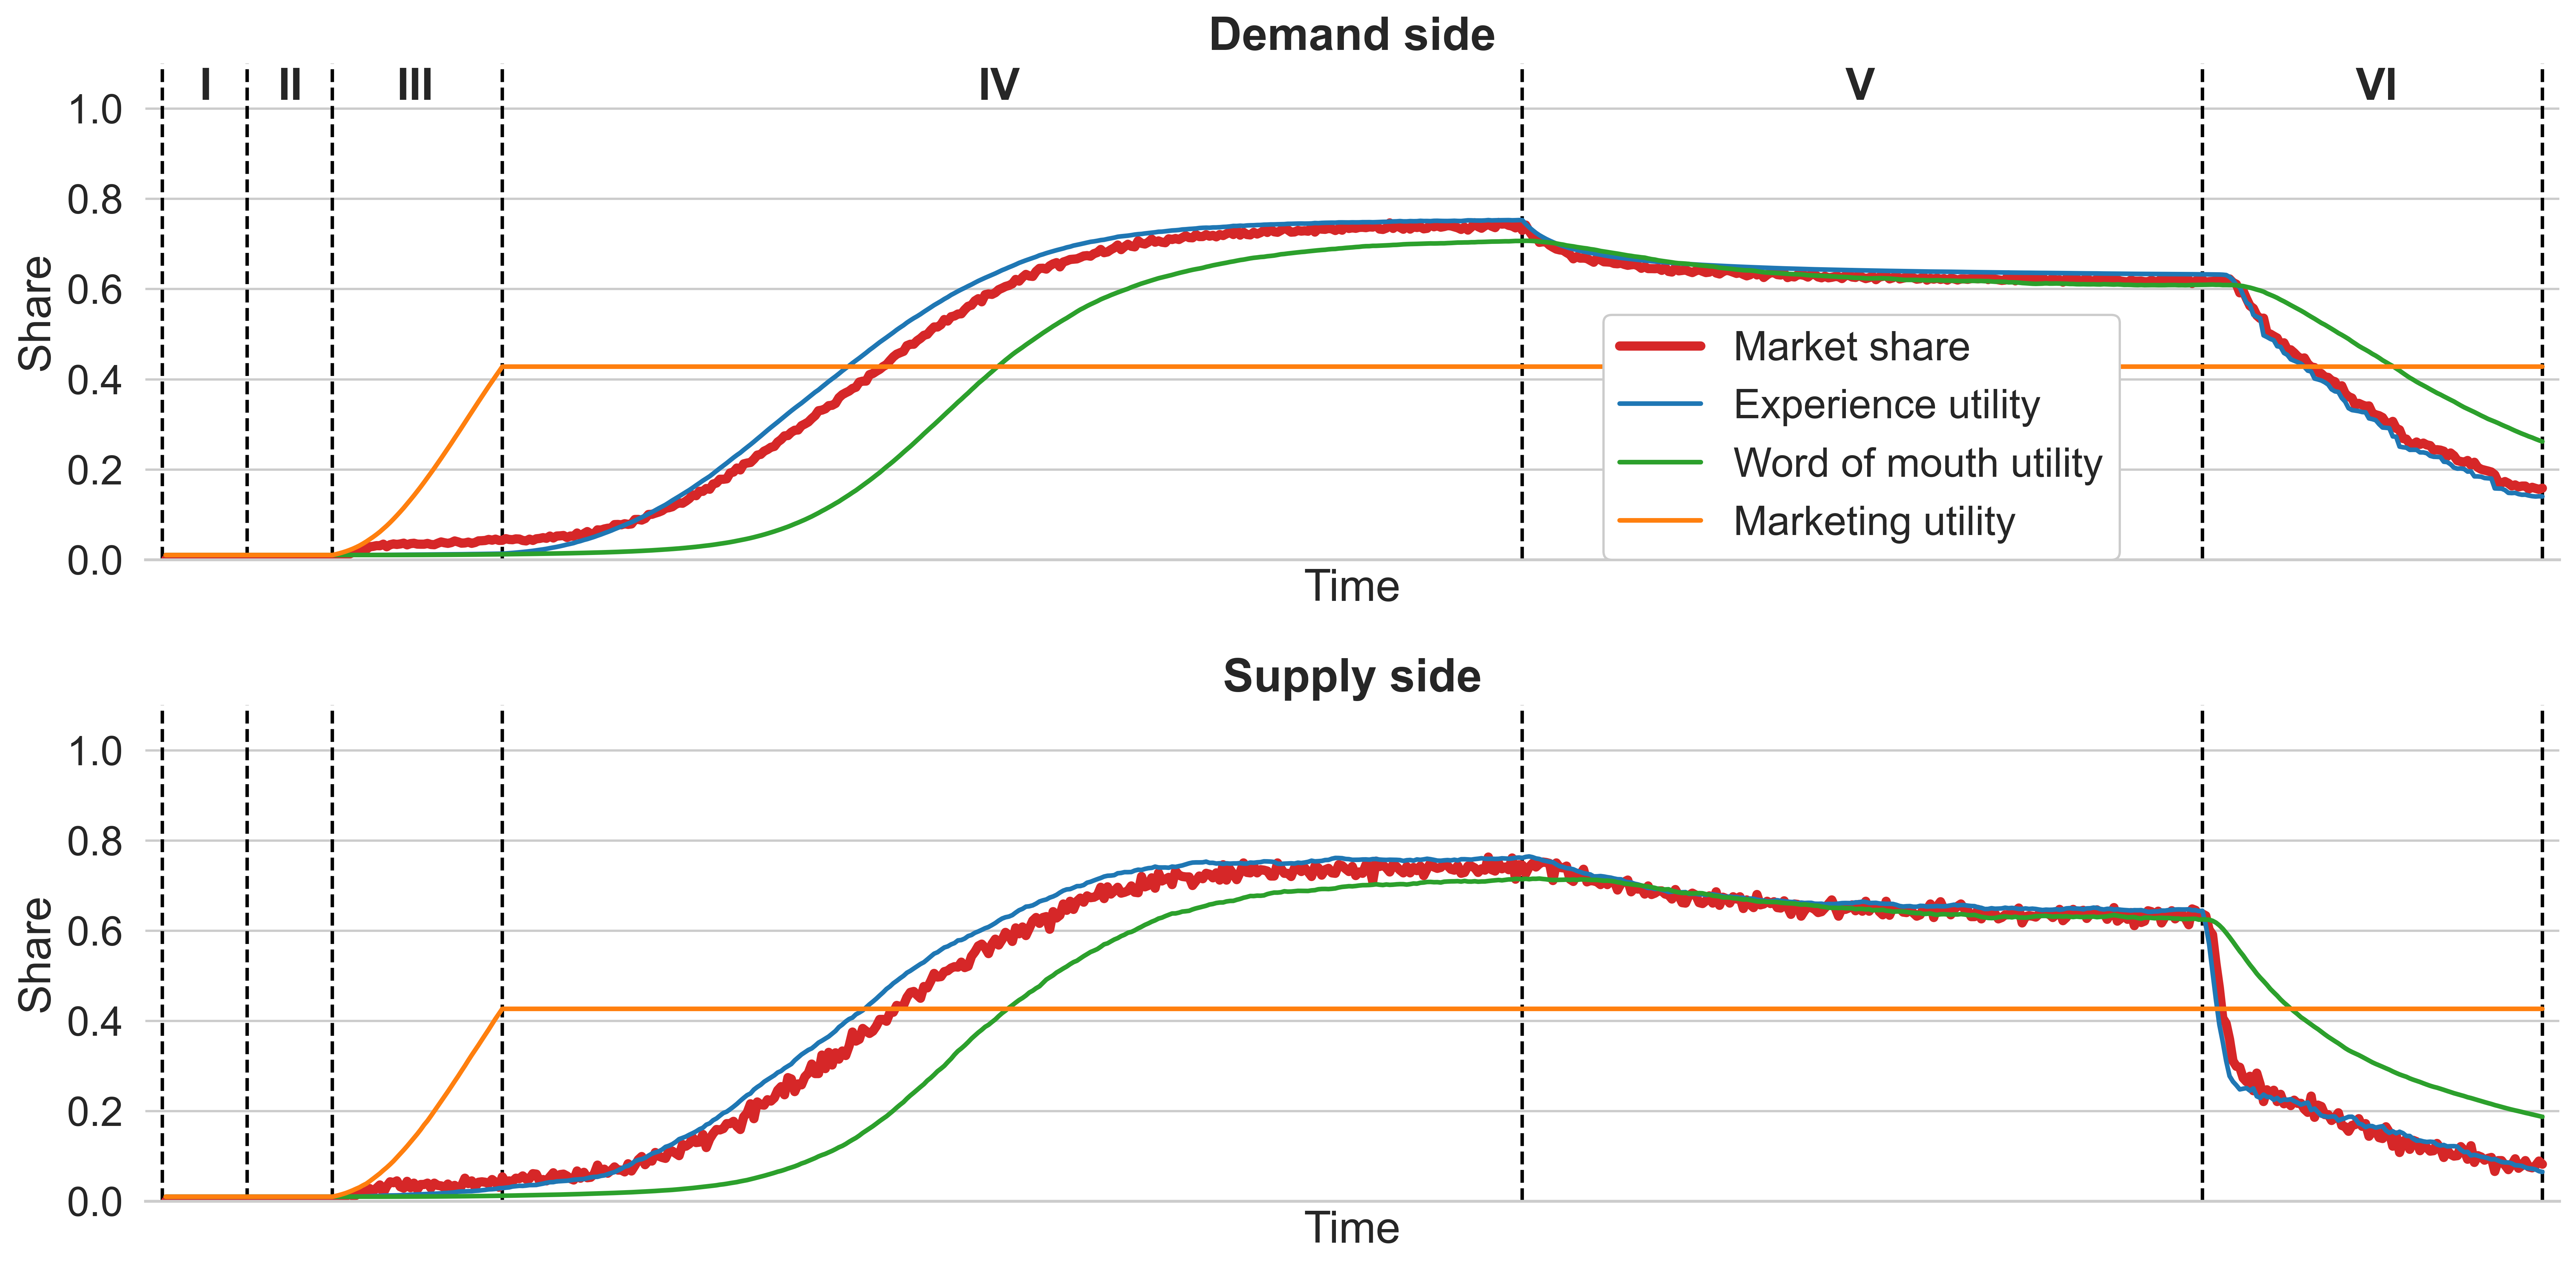

In [11]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1.6)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

nD = 700
df_d = df_d[0:nD]
df_ss = df_s[0:nD] 

for row in range(0,2):
    
    if row==0:
        df=df_d[0:nD]; n=nP; label='Demand side'
    elif row==1:
        df = df_s[0:nD]; n =nV; label='Supply side'
        
    lx = [i for i in range(1,nD+1)]
    sns.lineplot(x=lx, y=df.OUT/n, label = 'Market share', color='C3', lw=4, ax=ax[row])
    sns.lineplot(x=lx, y=df.EXPERIENCE_U, label = 'Experience utility', color='C0', lw=2, ax=ax[row])
    sns.lineplot(x=lx, y=df.WOM_U, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[row])
    sns.lineplot(x=lx, y=df.MARKETING_U, label = 'Marketing utility', color='C1', lw=2, ax=ax[row])

    ax[row].grid(axis='x')
    ax[row].set(xlabel='Time', ylabel='Share', ylim=(0,1.1),  xlim=(-5,nD+5))
    ax[row].set_title(label,fontweight='bold', loc='center',fontsize=20)

    ax[row].vlines([0,25,50,100,400,600,700], 0, 1.1, linestyles='dashed', colors='black')
    ax[row].set_xticks([])
    # ax[0].set_xticks([0,14,25,75,289,385,481])
    # ax[0].set_xticklabels(['2012-01-01','2012-04-01','2012-07-01','2013-07-01','2018-01-01','2020-01-01','2022-01-01'],
    #                      rotation=-90)
    
for i in range(0,6):
        value = ['I','II','III','IV','V','VI']
        coords = [(11,1.02),(34,1.02),(69,1.02),(240,1.02),(495,1.02),(645,1.02)]
        ax[0].annotate(value[i], xy =coords[i], fontweight='bold')   
        
ax[0].legend(frameon=True,framealpha=1, loc=(0.604,0.0))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
# ax[0].get_legend().set_visible(False)


plt.tight_layout()
plt.savefig('Figs/P1-figs/Fig3.png')

#### Fig-4: Episodes (aggregated performance)

In [16]:
def smooth(y,w=51,o=1,d=2):
    from scipy.signal import savgol_filter
    nans = [float('nan') for i in range(0,d)] 
    y = nans + list(savgol_filter(y[d:],w,o))
    for i in range(0,len(y)):
        if y[i]<0:
            y[i] = 0
    return y

In [17]:
df_dd.iloc[0:51] = df_dd.loc[51]
df_ss.iloc[0:51] = df_ss.loc[51]

C:\Users\farno\anaconda3\lib\site-packages\pandas\core\indexing.py:1797: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, v, pi)


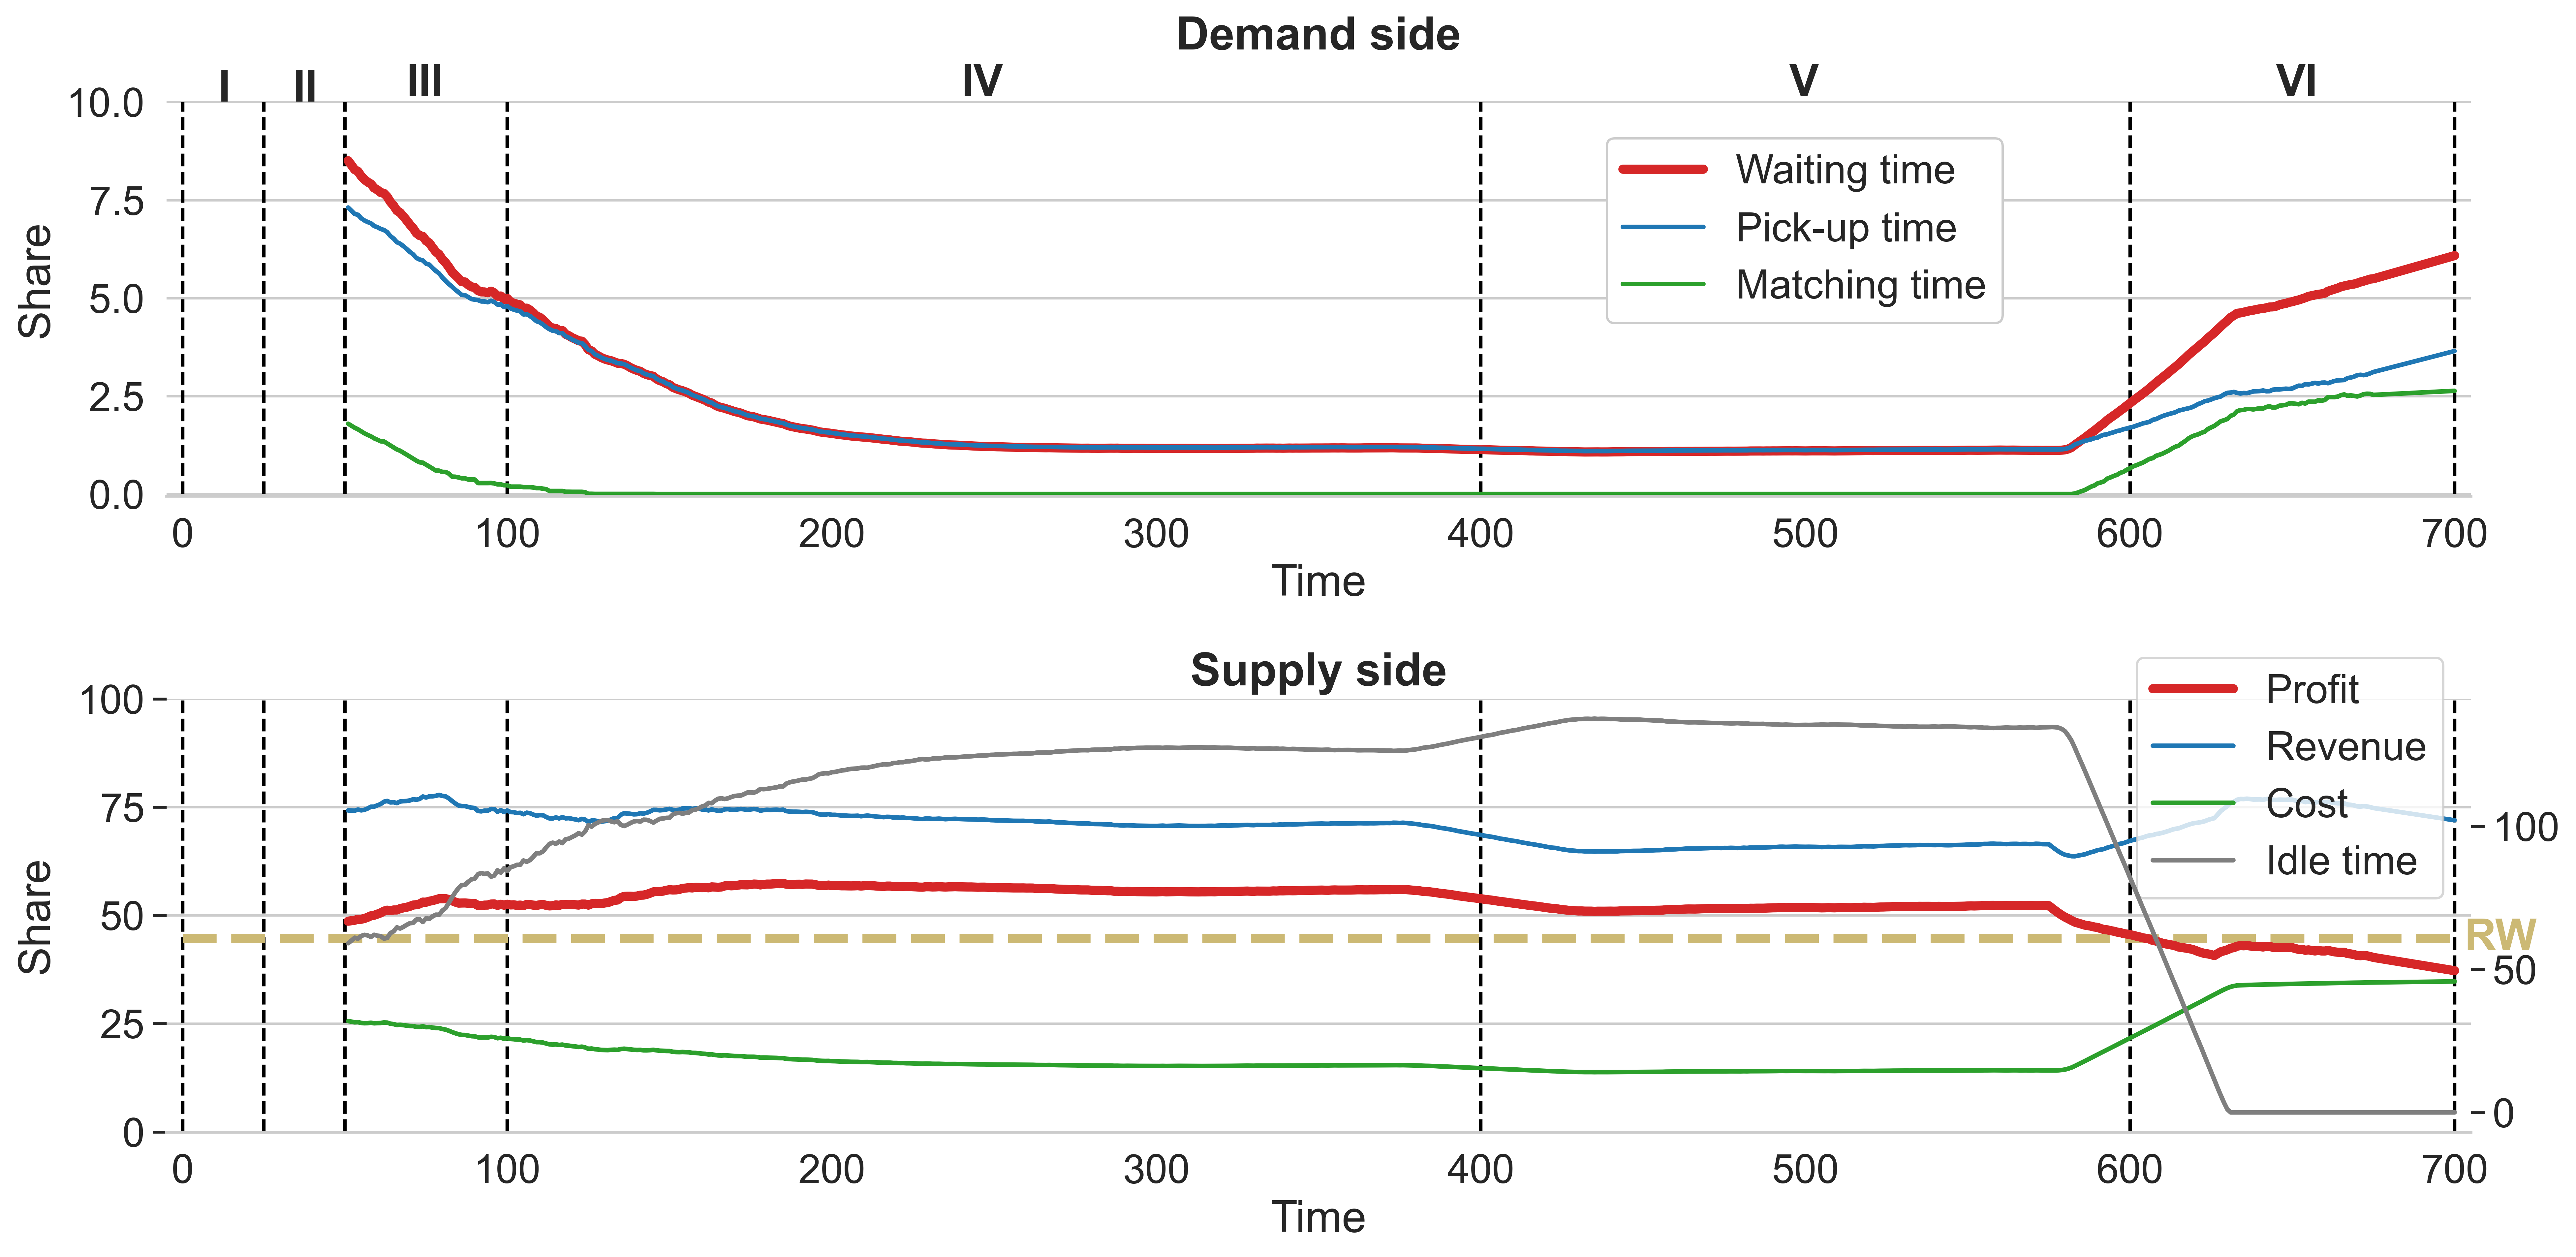

In [18]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1.6)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

RW = 4*11.16
nD = 700
df_dd = df_d[0:nD]
df_ss = df_s[0:nD] 

lx = [i for i in range(51,nD+1)]

sns.lineplot(x=lx, y=smooth(df_dd.ACTUAL_WT)[50:], label = 'Waiting time', color='C3',lw=4, ax=ax[0])#, marker='o')
sns.lineplot(x=lx, y=smooth(df_ss.ARRIVES_AT_PICKUP/(df_ss.nRIDES*60))[50:], label = 'Pick-up time', color='C0',lw=2, ax=ax[0])#, marker='o')
sns.lineplot(x=lx, y=smooth(df_dd.MATCHING_T)[50:], label = 'Matching time', color='C2',lw=2, ax=ax[0])#, marker='o')

sns.lineplot(x=lx, y=smooth(df_ss.ACTUAL_INC)[50:], label = 'Profit', color='C3',lw=4, ax=ax[1])#, marker='o')
sns.lineplot(x=lx, y=smooth(df_ss.REVENUE)[50:], label = 'Revenue', color='C0',lw=2, ax=ax[1])#, marker='o')
sns.lineplot(x=lx, y=smooth(df_ss.COST)[50:], label = 'Cost', color='C2',lw=2, ax=ax[1])#, marker='o')ax.twinx()

ax11 = ax[1].twinx()
sns.lineplot(x=lx, y=smooth((df_ss.IDLE_TIME/60)-60*2)[50:], label = 'Idle time', color='C7',lw=2, ax=ax11)#, marker='o')
# ax11.set(ylabel='Time [min]', ylim=(-0.05,9),  xlim=(-5,nD+5))
ax11.grid(b=None)

for row in [0,1]:
    if row==0:
        ax[row].set_title(label='Demand side',fontweight='bold', loc='center',fontsize=20)
        ax[row].vlines([0,25,50,100,400,600,700], 0, 10, linestyles='dashed', colors='black')
        ax[row].set(xlabel='Time', ylabel='Share', ylim=(-0.05,11),  xlim=(-5,nD+5))
    elif row==1:
        ax[row].set_title(label='Supply side',fontweight='bold', loc='center',fontsize=20)
        ax[row].vlines([0,25,50,100,400,600,700], 0, 100, linestyles='dashed', colors='black')
        ax[row].set(xlabel='Time', ylabel='Share', ylim=(-0.05,100),  xlim=(-5,nD+5))
        
    ax[row].grid(axis='x')
    # ax[row].set_xticks([])
    
    

    # ax[0].set_xticks([0,14,25,75,289,385,481])
    # ax[0].set_xticklabels(['2012-01-01','2012-04-01','2012-07-01','2013-07-01','2018-01-01','2020-01-01','2022-01-01'],
    #                      rotation=-90)

    
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(11,10.02),(34,10.02),(69,10.16),(240,10.16),(495,10.16),(645,10.16)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')
    
ax[1].hlines([RW], 0, nD, linestyles='dashed', colors='y', lw=4)
ax[1].annotate('RW', xy =(nD+3,42), fontweight='bold', color='y')    


lines, labels = ax[1].get_legend_handles_labels()
lines2, labels2 = ax11.get_legend_handles_labels()
ax[1].legend(lines + lines2, labels + labels2,framealpha=0.8, loc=(0.855,0.54))
ax11.legend().remove()

ax[1].set_title(label='Supply side',fontweight='bold', loc='center',fontsize=20)

ax[0].legend(frameon=True,framealpha=1, loc=(0.625,0.4))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
# ax[1].get_legend().set_visible(False)
sns.despine(left=True)
fig.align_ylabels()

plt.tight_layout()
# plt.savefig('Figs/P1-figs/Fig4.png')

#### Fig-5: Individual evolutions

In [165]:
B_Experience=0.7; B_Marketing=0.1; B_WOM=0.2; m=7

pax_a = pd.DataFrame(); pax_b = pd.DataFrame()
veh_a = pd.DataFrame(); veh_b = pd.DataFrame()
agent = [pax_a, pax_b, veh_a, veh_b]

ids = [52,24,14,598]
n=0

for i in ids:
    ye = []; ym = []; yw = []; yu = []; yp = []
    if n <2:
        for d in range(0,nD):
            day = pd.read_csv('data/dataframes/episodes/days/episodes/pax_day_{}.csv'.format(d))
            ye.append(day.loc[i].EXPERIENCE_U)
            ym.append(day.loc[i].MARKETING_U)
            yw.append(day.loc[i].WOM_U)
            u = (B_Experience*ye[-1])+(B_Marketing*ym[-1])+(B_WOM*yw[-1])
            yu.append(u)
            yp.append((math.exp(m*u))/(math.exp(m*u) + math.exp(m*0.5)))
        agent[n]['EXPERIENCE_U'] = ye; agent[n]['WOM_U'] = yw; agent[n]['MARKETING_U'] = ym; agent[n]['PROBABILITY'] = yp     
    else:
        for d in range(0,nD):
            day = pd.read_csv('data/dataframes/episodes/days/episodes/veh_day_{}.csv'.format(d))
            ye.append(day.loc[i].EXPERIENCE_U)
            ym.append(day.loc[i].MARKETING_U)
            yw.append(day.loc[i].WOM_U)
            u = (B_Experience*ye[-1])+(B_Marketing*ym[-1])+(B_WOM*yw[-1])
            yu.append(u)
            yp.append((math.exp(m*u))/(math.exp(m*u) + math.exp(m*0.5)))
        agent[n]['EXPERIENCE_U'] = ye; agent[n]['WOM_U'] = yw; agent[n]['MARKETING_U'] = ym; agent[n]['PROBABILITY'] = yp     
    n = n+1

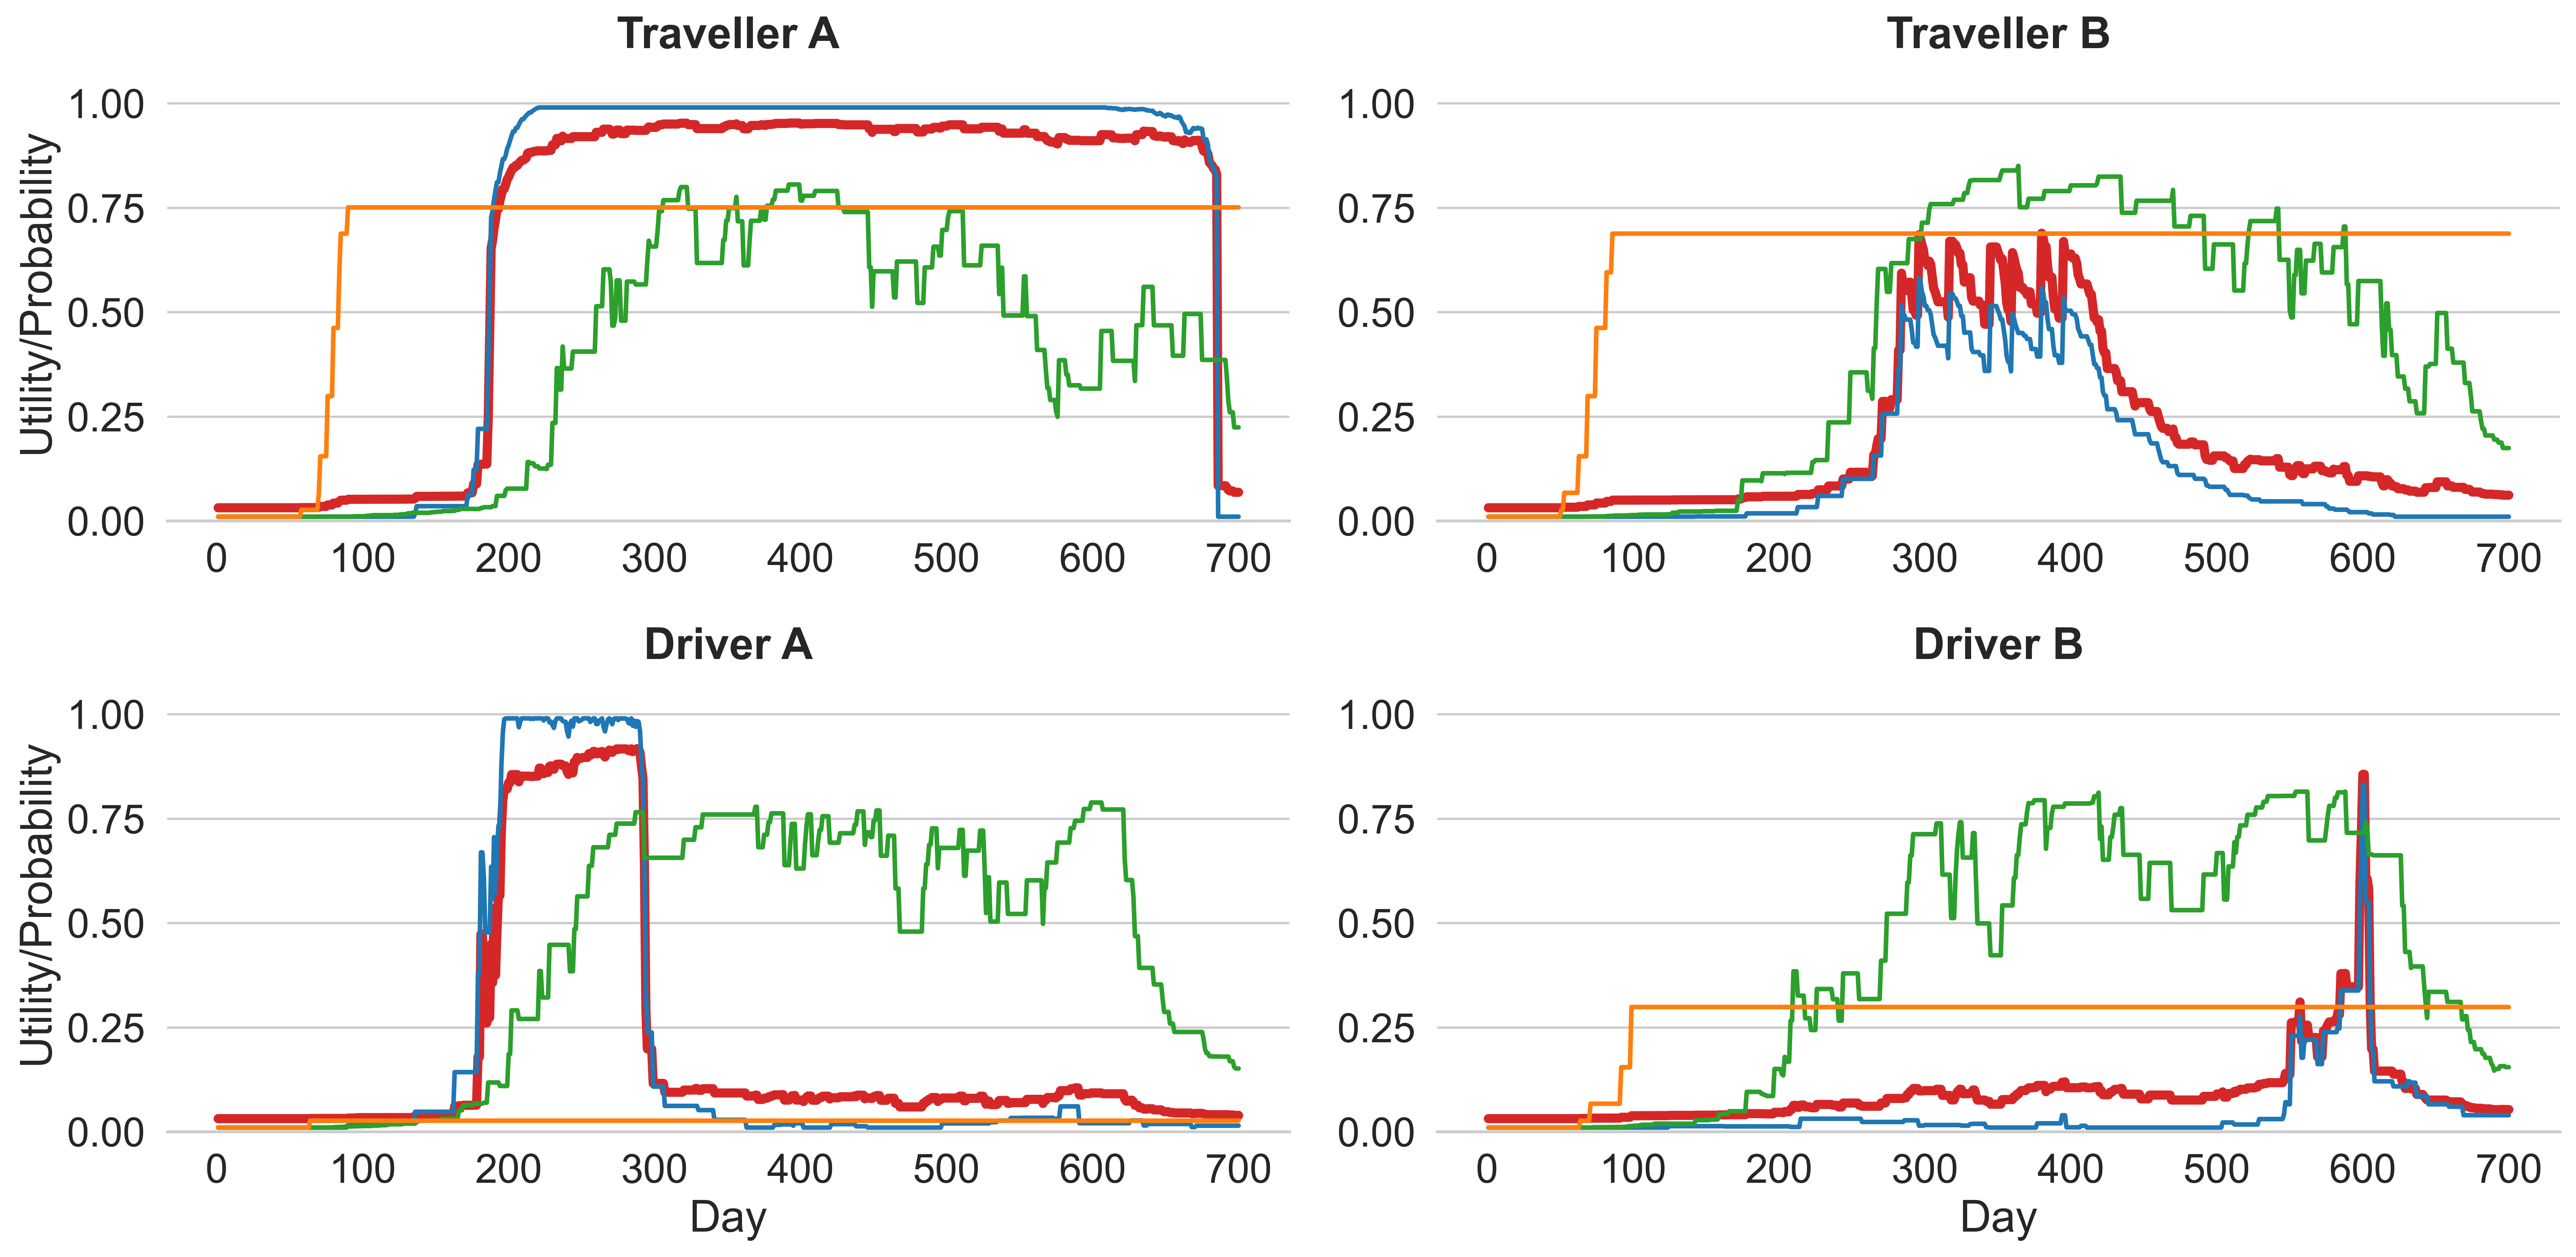

In [166]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1.6)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(16,8))
sns.despine(left=True)

# ids = [3,8,2,37]
# agent = [pax3,pax8,driver2,driver37]
n = 0

for n in range(0,4):
    
    x = [i for i in range(1,nD+1)]
    if n<2:
        sns.lineplot(x=x, y=agent[n].PROBABILITY, label = 'Probability', color='C3', linewidth=4, ax=ax[0,n])
        sns.lineplot(x=x, y=agent[n].EXPERIENCE_U, label = 'Experienced utility', color='C0', lw=2, ax=ax[0,n])#, marker='o')
        sns.lineplot(x=x, y=agent[n].WOM_U, label = 'WOM utility', color='C2',lw=2, ax=ax[0,n])#, marker='o')
        sns.lineplot(x=x, y=agent[n].MARKETING_U, label = 'Marketing utility', color='C1',lw=2, ax=ax[0,n])#, marker='o')

        ax[0,n].set(xlabel='', ylabel='', ylim=(0,1.1))
        ax[0,n].grid(axis='x')
        
    else:
        sns.lineplot(x=x, y=agent[n].PROBABILITY, label = 'Probability', color='C3', linewidth=4, ax=ax[1,n-2])
        sns.lineplot(x=x, y=agent[n].EXPERIENCE_U, label = 'Experienced utility', color='C0', lw=2, ax=ax[1,n-2])#, marker='o')
        sns.lineplot(x=x, y=agent[n].WOM_U, label = 'WOM utility', color='C2',lw=2, ax=ax[1,n-2])#, marker='o')
        sns.lineplot(x=x, y=agent[n].MARKETING_U, label = 'Marketing utility', color='C1',lw=2, ax=ax[1,n-2])#, marker='o')
        
        ax[1,n-2].set(xlabel='Day', ylabel='', ylim=(0,1.1))
        ax[1,n-2].grid(axis='x')
    
ax[0,0].legend(loc=(0,1.2), frameon=True, ncol=2, fontsize=20)
ax[0,0].set(ylabel='Utility/Probability'); ax[1,0].set(ylabel='Utility/Probability')
ax[0,0].get_legend().set_visible(False);ax[0,1].get_legend().set_visible(False);
ax[1,0].get_legend().set_visible(False);ax[1,1].get_legend().set_visible(False);

ax[0,0].set_title('Traveller A',fontweight='bold'); ax[0,1].set_title('Traveller B',fontweight='bold'); ax[1,0].set_title('Driver A',fontweight='bold'); ax[1,1].set_title('Driver B',fontweight='bold')

plt.tight_layout()
plt.savefig('Figs/P1-figs/Fig5.png')

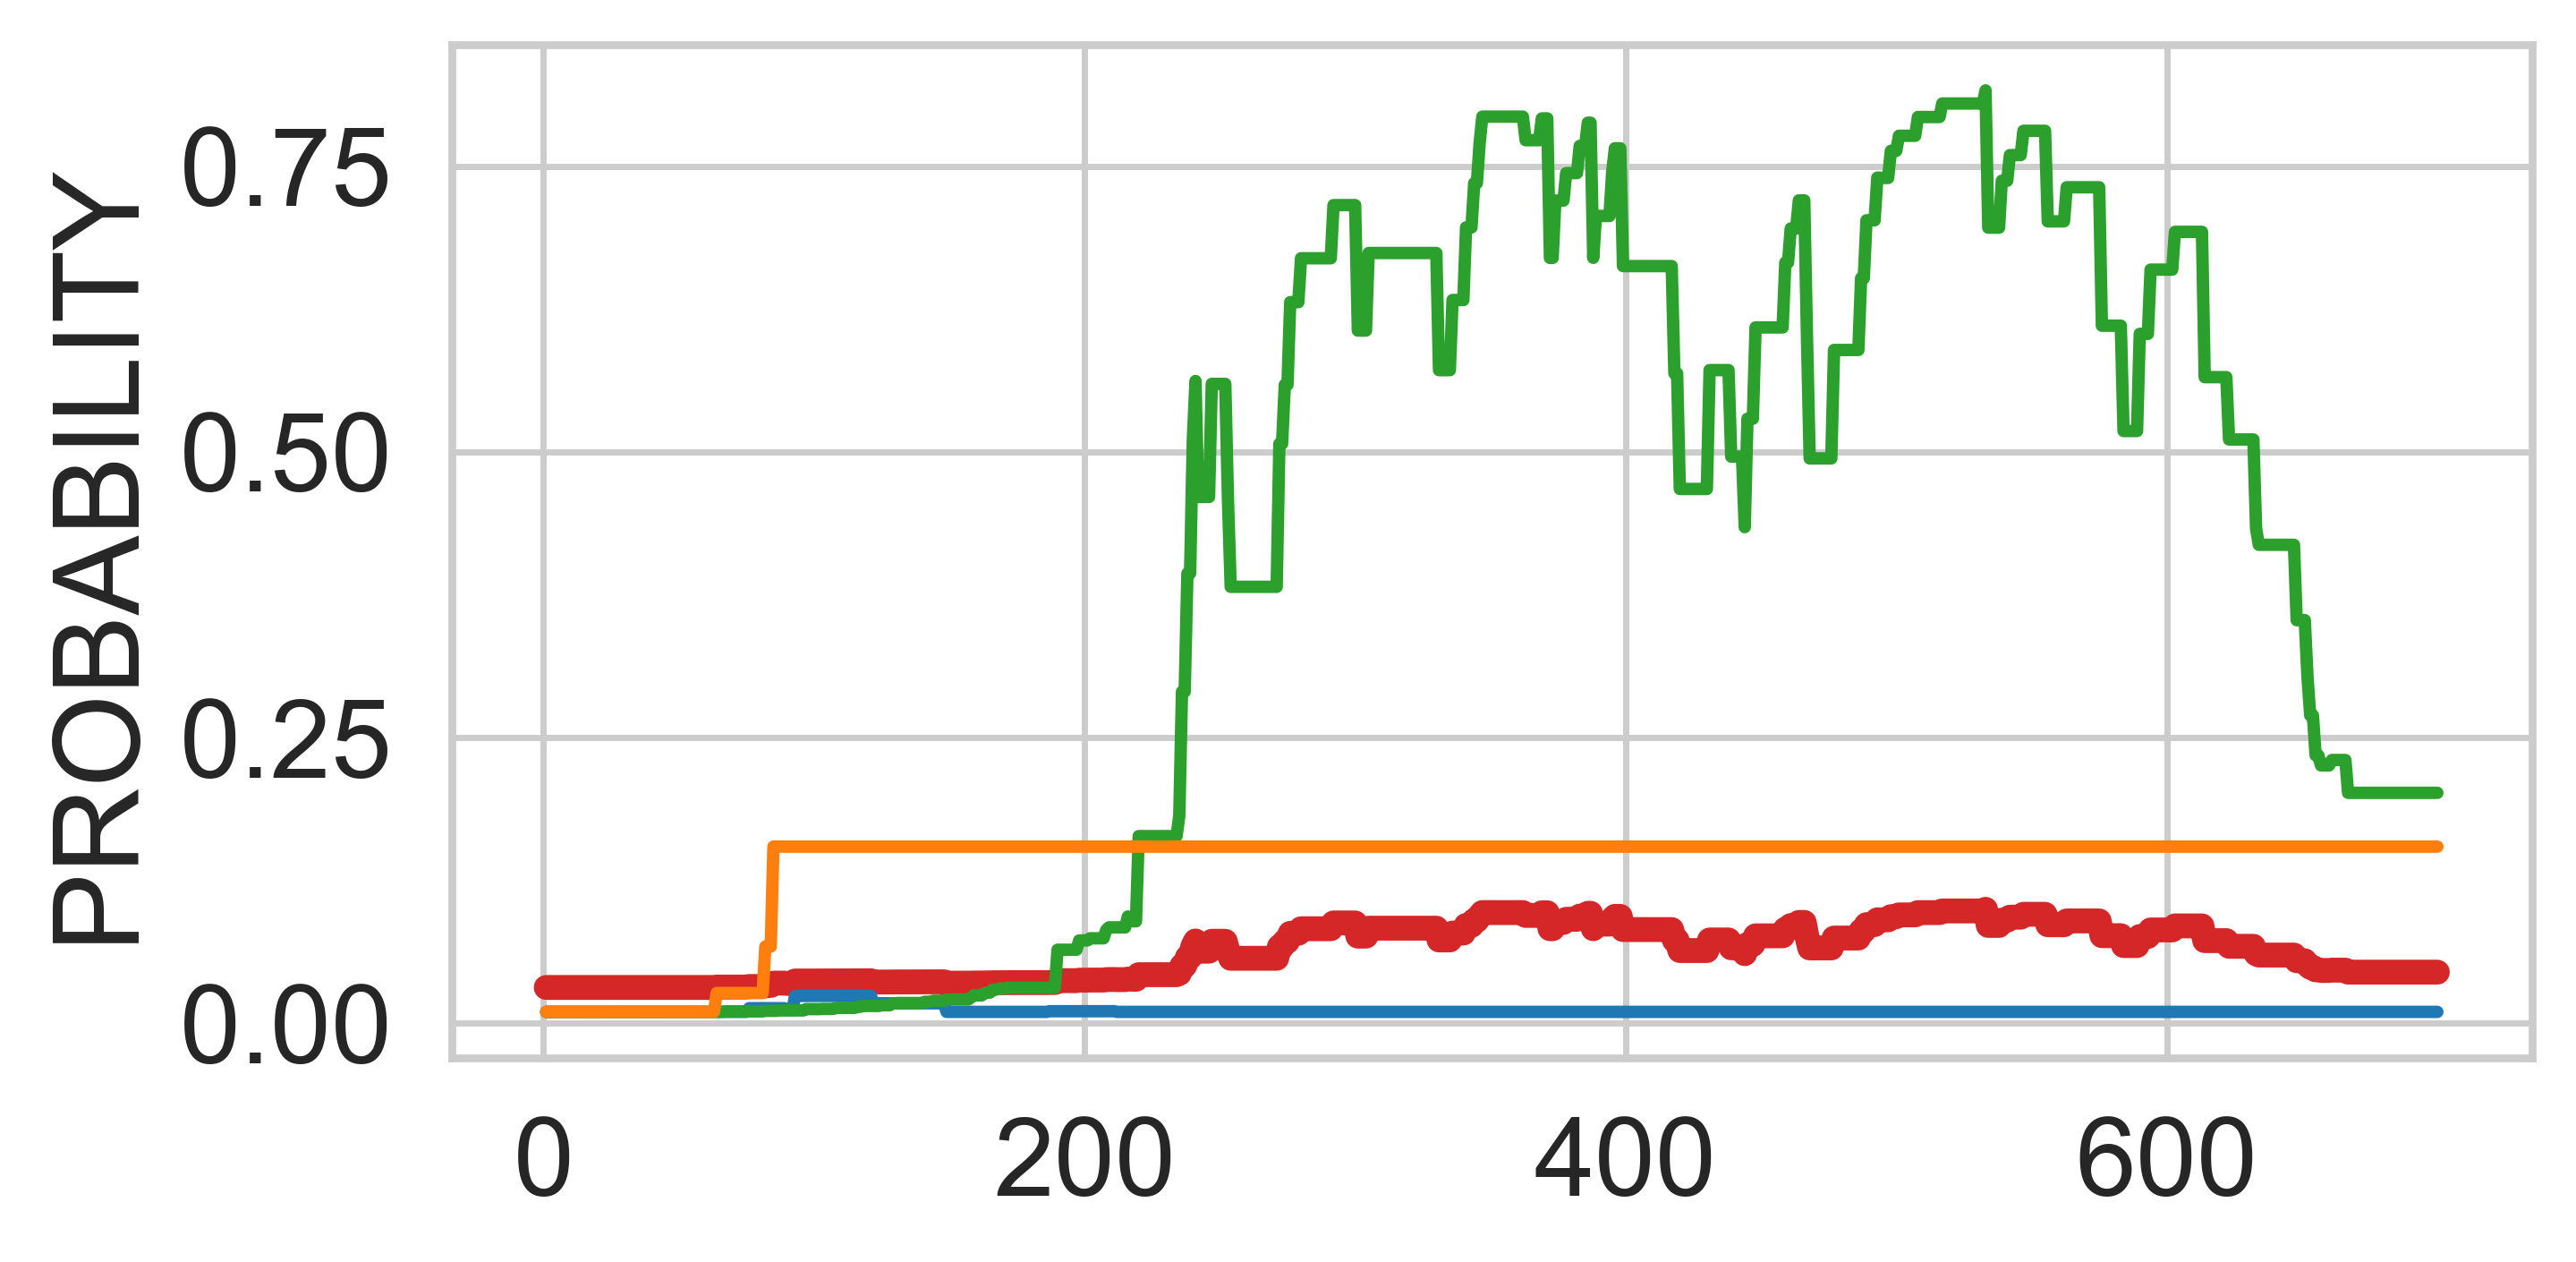

In [164]:
B_Experience=0.7; B_Marketing=0.1; B_WOM=0.2; m=7

pax_a = pd.DataFrame(); pax_b = pd.DataFrame()
veh_a = pd.DataFrame(); veh_b = pd.DataFrame()
agent = [pax_a, pax_b, veh_a, veh_b]
#349-598
i = 995
n = 0

ye = []; ym = []; yw = []; yu = []; yp = []
for d in range(0,nD):
    day = pd.read_csv('data/dataframes/episodes/days/episodes/veh_day_{}.csv'.format(d))
    ye.append(day.loc[i].EXPERIENCE_U)
    ym.append(day.loc[i].MARKETING_U)
    yw.append(day.loc[i].WOM_U)
    u = (B_Experience*ye[-1])+(B_Marketing*ym[-1])+(B_WOM*yw[-1])
    yu.append(u)
    yp.append((math.exp(m*u))/(math.exp(m*u) + math.exp(m*0.5)))
agent[n]['EXPERIENCE_U'] = ye; agent[n]['WOM_U'] = yw; agent[n]['MARKETING_U'] = ym; agent[n]['PROBABILITY'] = yp     

fig, ax = plt.subplots(figsize=(6,3))

sns.lineplot(x=x, y=agent[n].PROBABILITY, label = 'Probability', color='C3', linewidth=4)
sns.lineplot(x=x, y=agent[n].EXPERIENCE_U, label = 'Experienced utility', color='C0', lw=2)#, marker='o')
sns.lineplot(x=x, y=agent[n].WOM_U, label = 'WOM utility', color='C2',lw=2)#, marker='o')
sns.lineplot(x=x, y=agent[n].MARKETING_U, label = 'Marketing utility', color='C1',lw=2)#, marker='o')

ax.get_legend().set_visible(False)

In [136]:
t = 0.05
for i in range(0,999):
    n = 0

    df = pd.read_csv('data/dataframes/episodes/days/episodes/veh_day_{}.csv'.format(100))
    if df.loc[i].EXPERIENCE_U<t:
        n = n+1
        
    df = pd.read_csv('data/dataframes/episodes/days/episodes/veh_day_{}.csv'.format(200))
    if df.loc[i].EXPERIENCE_U<t:
        n = n+1
    
    df = pd.read_csv('data/dataframes/episodes/days/episodes/veh_day_{}.csv'.format(300))
    if df.loc[i].EXPERIENCE_U<t:
        n = n+1
    
    df = pd.read_csv('data/dataframes/episodes/days/episodes/veh_day_{}.csv'.format(400))
    if df.loc[i].EXPERIENCE_U<t:
        n = n+1
        
    df = pd.read_csv('data/dataframes/episodes/days/episodes/veh_day_{}.csv'.format(500))
    if df.loc[i].EXPERIENCE_U<t:
        n = n+1
    
    if n>4:
        print(i)

67
79
118
133
219
223
225
334
346
349
513
535
570
598
600
612
613
640
695
708
740
801
805
813
816
878
960
995


In [133]:
d=300
df = pd.read_csv('data/dataframes/episodes/days/episodes/veh_day_{}.csv'.format(d))
df.loc[0]

veh                                 2
nRIDES                            0.0
nREJECTED                         0.0
nDAYS_WORKED                     29.0
DRIVING_TIME                      0.0
IDLE_TIME                         0.0
PICKUP_DIST                       0.0
DRIVING_DIST                      0.0
REVENUE                           0.0
COST                              0.0
COMMISSION                        0.0
TRIP_FARE                         0.0
ACTUAL_INC                        0.0
OUT                              True
mu                                  0
INFORMED                         True
EXPERIENCE_U                  0.13674
MARKETING_U                  0.595287
WOM_U                        0.770962
STARTS_DAY                          0
OPENS_APP                           0
RECEIVES_REQUEST                  0.0
ACCEPTS_REQUEST                   0.0
REJECTS_REQUEST                     0
IS_ACCEPTED_BY_TRAVELLER          0.0
IS_REJECTED_BY_TRAVELLER            0
ARRIVES_AT_P

#### Fig-6: Sensitivy

In [24]:
import datetime
import matplotlib.dates as mdates

nD = 500
base = pd.Timestamp('2012-07-01')
n_days = nD
step = 7.6 #7.6
timestamp = [base + datetime.timedelta(days=step*x) for x in range(n_days)]

df_d = pd.read_csv('data/dataframes/baseline_demand1.csv'); df_d['date'] = timestamp
df_s = pd.read_csv('data/dataframes/baseline_supply1.csv'); df_s['date'] = timestamp

df_c30_d = pd.read_csv('data/dataframes/comm_30_demand1.csv'); df_c30_d['date'] = timestamp
df_c30_s = pd.read_csv('data/dataframes/comm_30_supply1.csv'); df_c30_s['date'] = timestamp

df_c10_d = pd.read_csv('data/dataframes/comm_10_demand1.csv'); df_c10_d['date'] = timestamp
df_c10_s = pd.read_csv('data/dataframes/comm_10_supply1.csv'); df_c10_s['date'] = timestamp

df_f18_d = pd.read_csv('data/dataframes/fare_1.8_demand1.csv'); df_f18_d['date'] = timestamp
df_f18_s = pd.read_csv('data/dataframes/fare_1.8_supply1.csv'); df_f18_s['date'] = timestamp

df_f06_d = pd.read_csv('data/dataframes/fare_0.6_demand1.csv'); df_f06_d['date'] = timestamp
df_f06_s = pd.read_csv('data/dataframes/fare_0.6_supply1.csv'); df_f06_s['date'] = timestamp

df_disc50_d = pd.read_csv('data/dataframes/disc_50%_demand1.csv'); df_disc50_d['date'] = timestamp
df_disc50_s = pd.read_csv('data/dataframes/disc_50%_supply1.csv'); df_disc50_s['date'] = timestamp

df_incen50_d = pd.read_csv('data/dataframes/incen_50%_demand1.csv'); df_incen50_d['date'] = timestamp
df_incen50_s = pd.read_csv('data/dataframes/incen_50%_supply1.csv'); df_incen50_s['date'] = timestamp

In [10]:
def ave(df_name):
    t = 0
    for i in range(1,6):
        df = pd.read_csv('data/dataframes/{}{}.csv'.format(df_name,i))
        t = t + df.OUT
    average = t/5
    return average

# ave('fare_0.6_demand')

In [41]:
def reps(df_name, side):
    df = pd.DataFrame()
    for i in range(1,6):
        df_new = pd.read_csv('data/dataframes/{}{}.csv'.format(df_name,i))
        df_new['rep_num'] = 'rep{}'.format(i)
        if side=='demand':
            df_new['OUT'] = df_new['OUT']/10000
        else
        df_new['date'] = timestamp
        df = pd.concat([df,df_new[['OUT','rep_num','date']]])
    
        # df.rename(columns = {'OUT':'OUT{}'.format(i)}, inplace = True)
    return df

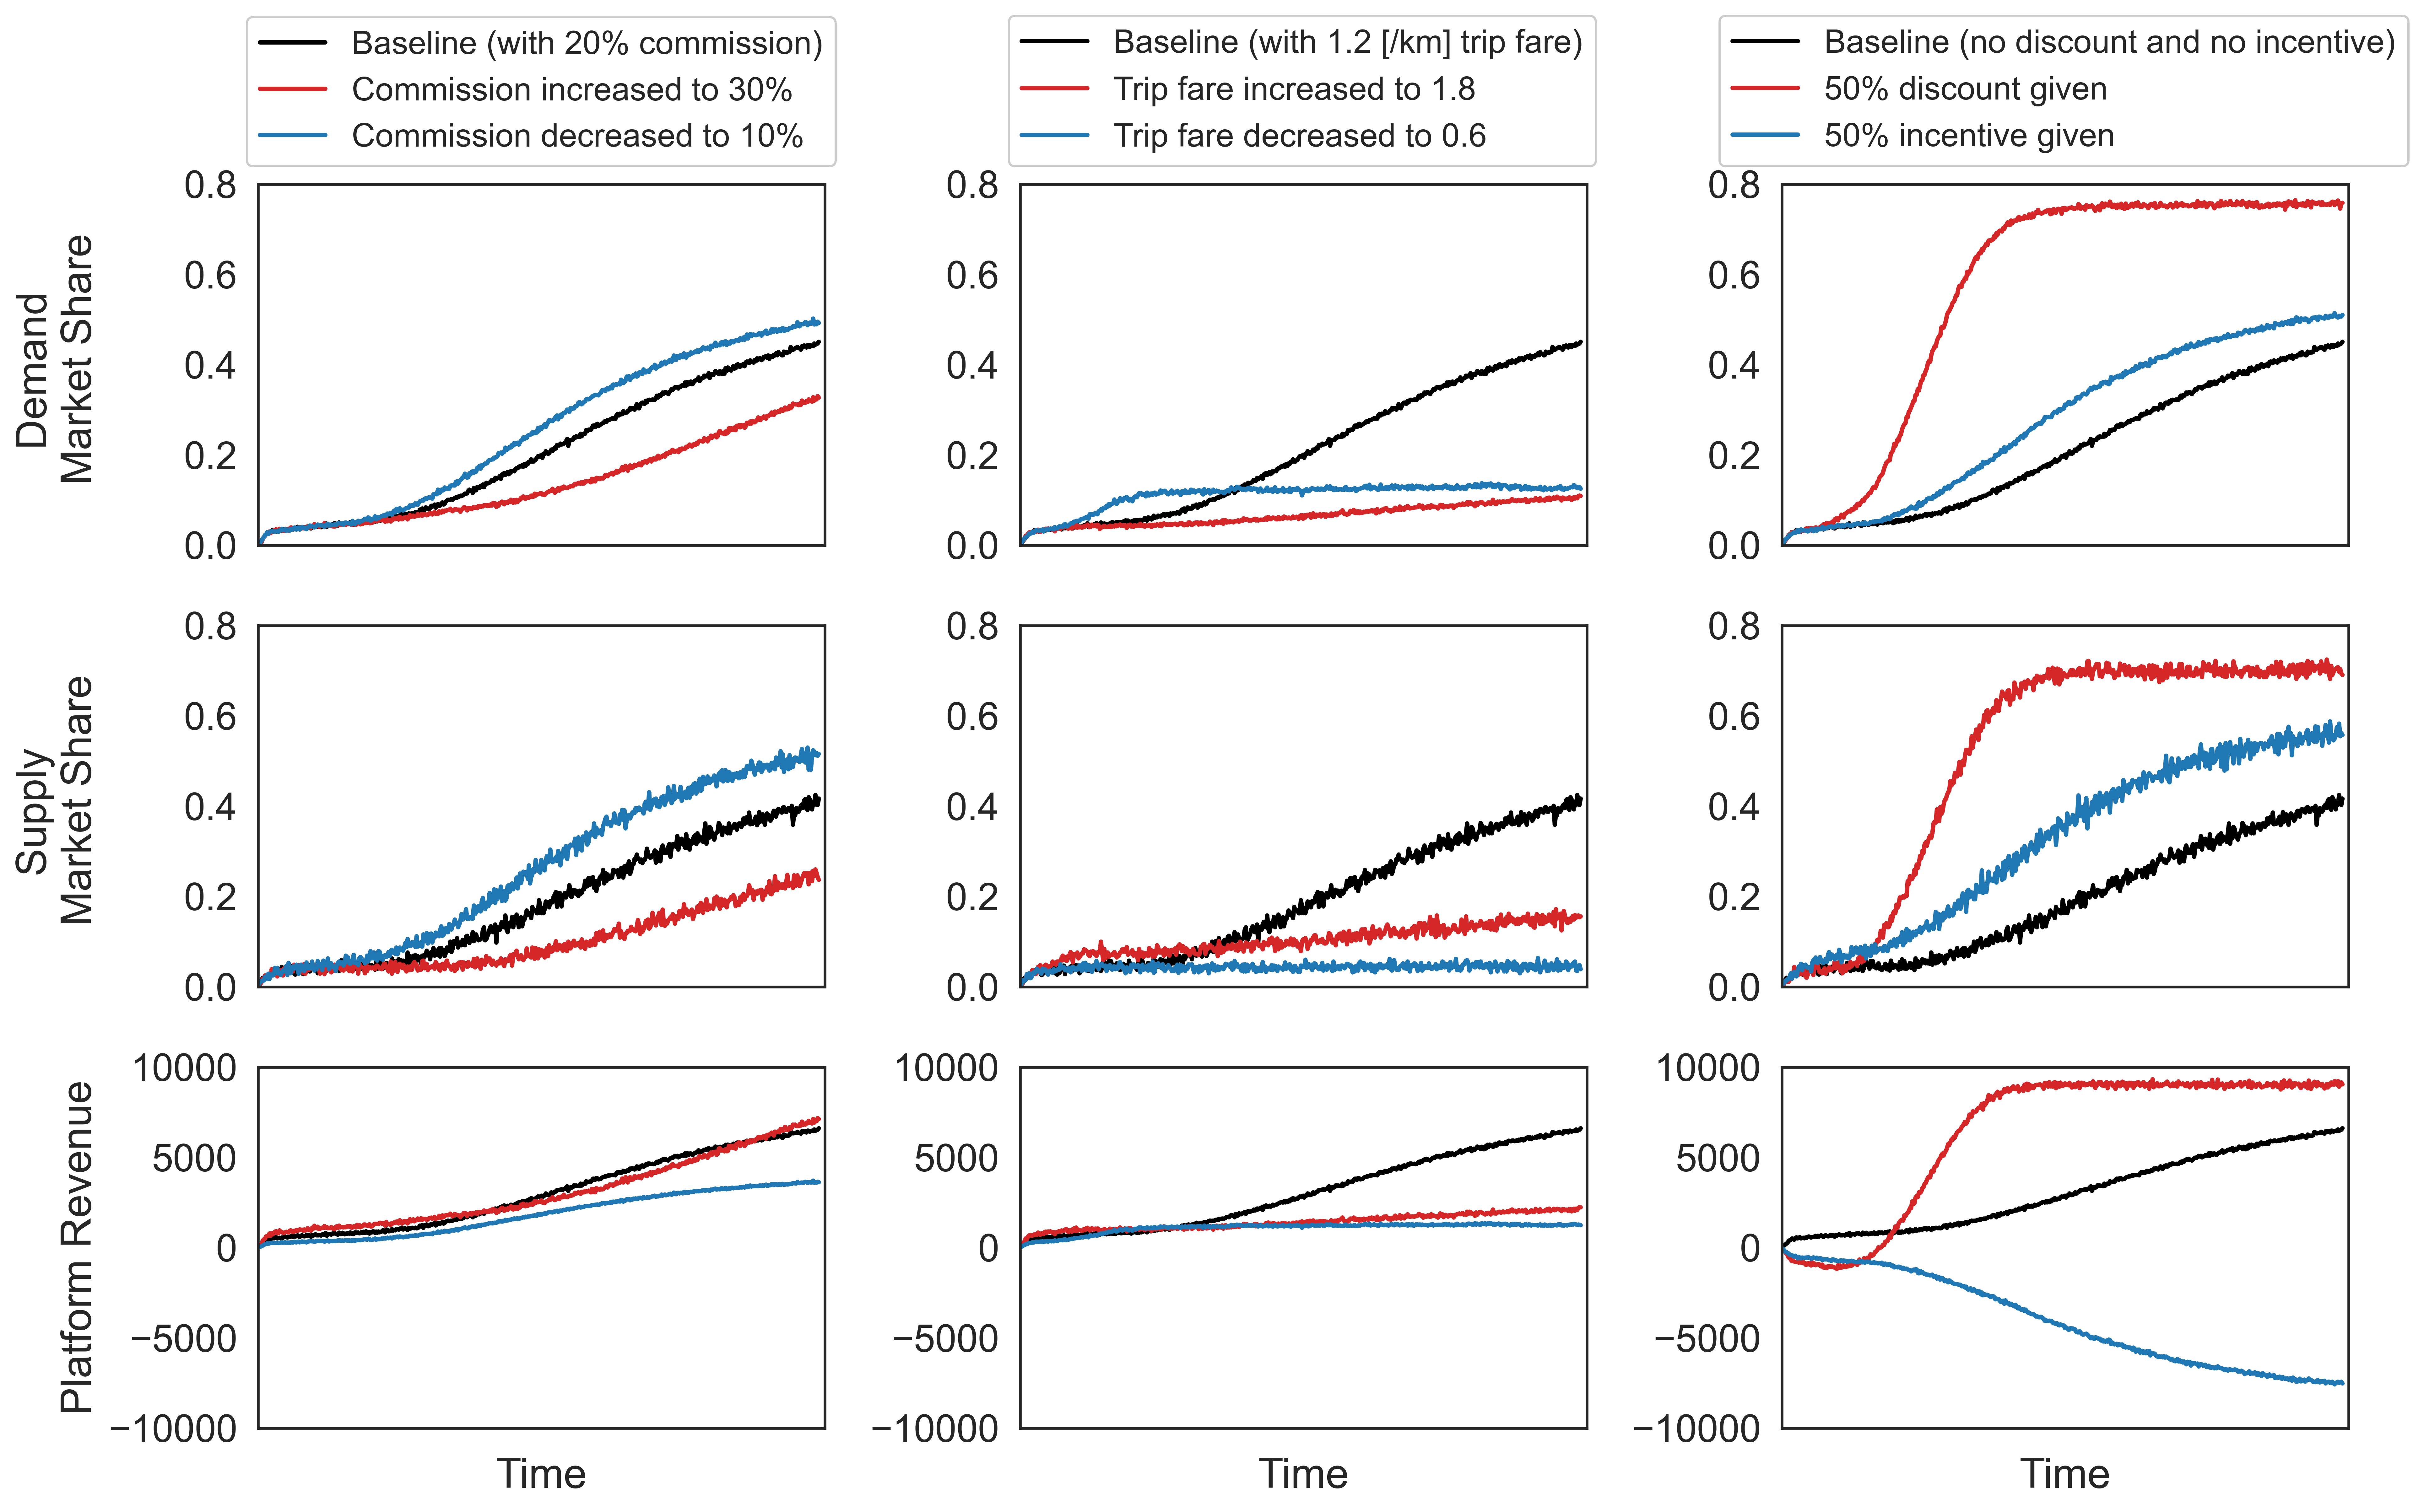

In [40]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1.6)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('white')
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(16,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
# sns.despine(left=True)

pallete = sns.color_palette("tab10")
c2=pallete[3]; c3=pallete[0]
lw = 2
# c2='darkred'; c3='darkblue'
start_date = pd.Timestamp('2012-07-01 00:00:00'); end_date = pd.Timestamp('2022-12-30 00:00:00')


for row in range(0,3):
    
    lx = [i for i in range(1,nD+1)]
    
    if row==0:
        n=10000; label='Demand side'
        sns.lineplot(x=df_d.date, y=df_d.OUT/n, label = 'Baseline (with 20% commission)', color='black', lw=lw, ax=ax[row][0])
        # sns.lineplot(data=reps('baseline_demand'), x='date', y='OUT', label = 'Baseline (with 20% commission)', color='black', lw=0.5, ax=ax[row][0])
        sns.lineplot(x=df_c30_d.date, y=df_c30_d.OUT/n, label = 'Commission increased to 30%', color=c2, lw=lw, ax=ax[row][0])
        sns.lineplot(x=df_c10_d.date, y=df_c10_d.OUT/n, label = 'Commission decreased to 10%', color=c3, lw=lw, ax=ax[row][0])
        
        sns.lineplot(x=df_d.date, y=df_d.OUT/n, label = 'Baseline (with 1.2 [/km] trip fare)', color='black', lw=lw, ax=ax[row][1])
        sns.lineplot(x=df_f18_d.date, y=df_f18_d.OUT/n, label = 'Trip fare increased to 1.8', color=c2, lw=lw, ax=ax[row][1])
        sns.lineplot(x=df_f06_d.date, y=df_f06_d.OUT/n, label = 'Trip fare decreased to 0.6', color=c3, lw=lw, ax=ax[row][1])

        sns.lineplot(x=df_d.date, y=df_d.OUT/n, label = 'Baseline (no discount and no incentive)', color='black', lw=lw, ax=ax[row][2])
        sns.lineplot(x=df_disc50_d.date, y=df_disc50_d.OUT/n, label = '50% discount given', color=c2, lw=lw, ax=ax[row][2])
        sns.lineplot(x=df_incen50_d.date, y=df_incen50_d.OUT/n, label = '50% incentive given', color=c3, lw=lw, ax=ax[row][2])
        
    elif row==1:
        n = 1000; label='Supply side'
        sns.lineplot(x=df_s.date, y=df_s.OUT/n, label = 'Baseline (with 20% commission)', color='black', lw=lw, ax=ax[row][0])
        sns.lineplot(x=df_c30_s.date, y=df_c30_s.OUT/n, label = 'Commission increased to 30%', color=c2, lw=lw, ax=ax[row][0])
        sns.lineplot(x=df_c10_s.date, y=df_c10_s.OUT/n, label = 'Commission decreased to 10%', color=c3, lw=lw, ax=ax[row][0])
        
        sns.lineplot(x=df_s.date, y=df_s.OUT/n, label = 'Baseline (with 1.2 [/km] trip fare)', color='black', lw=lw, ax=ax[row][1])
        sns.lineplot(x=df_f18_s.date, y=df_f18_s.OUT/n, label = 'Trip fare increased to 1.8', color=c2, lw=lw, ax=ax[row][1])
        sns.lineplot(x=df_f06_s.date, y=df_f06_s.OUT/n, label = 'Trip fare decreased to 0.6', color=c3, lw=lw, ax=ax[row][1])
    
        sns.lineplot(x=df_s.date, y=df_s.OUT/n, label = 'Baseline (no discount and no incentive)', color='black', lw=lw, ax=ax[row][2])
        sns.lineplot(x=df_disc50_s.date, y=df_disc50_s.OUT/n, label = '50% discount given', color=c2, lw=lw, ax=ax[row][2])
        sns.lineplot(x=df_incen50_s.date, y=df_incen50_s.OUT/n, label = '50% incentive given', color=c3, lw=lw, ax=ax[row][2])
        
    elif row==2:
        n = 1000; label='Platform'
        sns.lineplot(x=df_d.date, y=df_d.OUT*df_d.plat_revenue, label = 'Baseline (with 20% commission)', color='black', lw=lw, ax=ax[row][0])
        sns.lineplot(x=df_c30_d.date, y=df_c30_d.OUT*df_c30_d.plat_revenue, label = 'Commission increased to 30%', color=c2, lw=lw, ax=ax[row][0])
        sns.lineplot(x=df_c10_d.date, y=df_c10_d.OUT*df_c10_d.plat_revenue, label = 'Commission decreased to 10%', color=c3, lw=lw, ax=ax[row][0])
        
        sns.lineplot(x=df_d.date, y=df_d.OUT*df_d.plat_revenue, label = 'Baseline (with 20% commission)', color='black', lw=lw, ax=ax[row][1])
        sns.lineplot(x=df_f18_d.date, y=df_f18_d.OUT*df_f18_d.plat_revenue, label = 'Trip fare increased to 1.8', color=c2, lw=lw, ax=ax[row][1])
        sns.lineplot(x=df_f06_d.date, y=df_f06_d.OUT*df_f06_d.plat_revenue, label = 'Trip fare decreased to 0.6', color=c3, lw=lw, ax=ax[row][1])
    
        sns.lineplot(x=df_d.date, y=df_d.OUT*df_d.plat_revenue, label = 'Baseline (no discount and no incentive)', color='black', lw=lw, ax=ax[row][2])
        sns.lineplot(x=df_disc50_d.date, y=df_disc50_d.OUT*df_disc50_d.plat_revenue, label = '50% discount given', color=c2, lw=lw, ax=ax[row][2])
        x = df_incen50_d.OUT*df_incen50_d.plat_revenue
        r = (x*100)/20; r = (r*80/100)*0.5; p = x-r
        sns.lineplot(x=df_incen50_d.date, y=p, label = '50% incentive given', color=c3, lw=lw, ax=ax[row][2])
        
        
    for col in range(0,3):
        ax[row][col].set(xlabel='', ylabel=None,xlim=(start_date, end_date), ylim=(0,0.8))
        ax[row][col].set(xlabel='', ylabel=None,xlim=(start_date, end_date), ylim=(0,0.8))
        ax[row][col].set(ylabel=None)
        ax[row][col].set_xticklabels([])
        ax[row][col].get_legend().set_visible(False)


ax[0][0].set(xlabel='', ylabel='Demand \n Market Share',xlim=(start_date, end_date), ylim=(0,0.8))
ax[1][0].set(xlabel='', ylabel='Supply \n Market Share',xlim=(start_date, end_date), ylim=(0,0.8))
ax[2][0].set(xlabel='Time', ylabel='Platform Revenue',xlim=(start_date, end_date), ylim=(-10000,10000))
ax[2][1].set(xlabel='Time',xlim=(start_date, end_date), ylim=(-10000,10000))
ax[2][2].set(xlabel='Time',xlim=(start_date, end_date), ylim=(-10000,10000))

ax[0][0].legend(frameon=True, framealpha=1, fontsize=15, loc=(-0.02,1.05))
ax[0][1].legend(frameon=True, framealpha=1, fontsize=15, loc=(-.02,1.05))
ax[0][2].legend(frameon=True, framealpha=1, fontsize=15, loc=(-0.11,1.05))

# fig.subplots_adjust(left=0.2, wspace=0.6)
fig.align_ylabels()


# ax[row][col].grid(axis='x')

# ax[row][col].set_title(label,fontweight='bold', loc='center',fontsize=10)
# ax[0][col].legend(frameon=True,framealpha=1, loc=(0.01,0.7))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
# ax[0][0].get_legend().set_visible(False)

plt.tight_layout()
plt.savefig('Figs/P1-figs/Fig6.png')

In [ ]:
# ax[row][col].set_xticks([pd.Timestamp('2012'), pd.Timestamp('2022')])
# ax[row][col].xaxis.set_major_locator(mdates.YearLocator(10, 1, 1))
# ax[row][col].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# ax.set_xticks([df_s.date.min(), df_s.date.max()])
# ax[row][col].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# # [base + datetime.timedelta(years=step*x) for x in range(10)]
# for label in ax.get_xticklabels(which='major'):
#     label.set(rotation=30, horizontalalignment='right')

In [43]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('white')
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10,6))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
# sns.despine(left=True)

lw = 1
c2='darkred'; c3='darkblue'
start_date = pd.Timestamp('2012-07-01 00:00:00'); end_date = pd.Timestamp('2022-12-30 00:00:00')


for row in range(0,3):
    
    lx = [i for i in range(1,nD+1)]
    
    if row==0:
        n=10000; label='Demand side'
        df = reps('baseline_demand'); df.OUT=df.OUT/n
        sns.lineplot(data=df, x='date', y='OUT', label = 'Baseline (with 20% commission)', color='black', lw=lw, ax=ax[row][0])
        sns.lineplot(x=df_c30_d.date, y=df_c30_d.OUT/n, label = 'Commission increased to 30%', color=c2, lw=lw, ax=ax[row][0])
        sns.lineplot(x=df_c10_d.date, y=df_c10_d.OUT/n, label = 'Commission decreased to 10%', color=c3, lw=lw, ax=ax[row][0])
        
        sns.lineplot(x=df_d.date, y=df_d.OUT/n, label = 'Baseline (with 1.2 [/km] trip fare)', color='black', lw=lw, ax=ax[row][1])
        sns.lineplot(x=df_f18_d.date, y=df_f18_d.OUT/n, label = 'Trip fare increased to 1.8', color=c2, lw=lw, ax=ax[row][1])
        sns.lineplot(x=df_f06_d.date, y=df_f06_d.OUT/n, label = 'Trip fare decreased to 0.6', color=c3, lw=lw, ax=ax[row][1])

        sns.lineplot(x=df_d.date, y=df_d.OUT/n, label = 'Baseline', color='black', lw=lw, ax=ax[row][2])
        sns.lineplot(x=df_disc50_d.date, y=df_disc50_d.OUT/n, label = '50% discount given', color=c2, lw=lw, ax=ax[row][2])
        sns.lineplot(x=df_incen50_d.date, y=df_incen50_d.OUT/n, label = '50% incentive given', color=c3, lw=lw, ax=ax[row][2])
        
    elif row==1:
        n = 1000; label='Supply side'
        dfs = reps('baseline_supply'); dfs.OUT=dfs.OUT/n
        sns.lineplot(data=dfs, x='date', y='OUT', label = 'Baseline (with 20% commission)', color='black', lw=lw, ax=ax[row][0])
        sns.lineplot(x=df_c30_s.date, y=df_c30_s.OUT/n, label = 'Commission increased to 30%', color=c2, lw=lw, ax=ax[row][0])
        sns.lineplot(x=df_c10_s.date, y=df_c10_s.OUT/n, label = 'Commission decreased to 10%', color=c3, lw=lw, ax=ax[row][0])
        
        sns.lineplot(x=df_s.date, y=df_s.OUT/n, label = 'Baseline (with 1.2 [/km] trip fare)', color='black', lw=lw, ax=ax[row][1])
        sns.lineplot(x=df_f18_s.date, y=df_f18_s.OUT/n, label = 'Trip fare increased to 1.8', color=c2, lw=lw, ax=ax[row][1])
        sns.lineplot(x=df_f06_s.date, y=df_f06_s.OUT/n, label = 'Trip fare decreased to 0.6', color=c3, lw=lw, ax=ax[row][1])
    
        sns.lineplot(x=df_s.date, y=df_s.OUT/n, label = 'Baseline', color='black', lw=lw, ax=ax[row][2])
        sns.lineplot(x=df_disc50_s.date, y=df_disc50_s.OUT/n, label = '50% discount given', color=c2, lw=lw, ax=ax[row][2])
        sns.lineplot(x=df_incen50_s.date, y=df_incen50_s.OUT/n, label = '50% incentive given', color=c3, lw=lw, ax=ax[row][2])
        
    elif row==2:
        n = 1000; label='Platform'
        sns.lineplot(x=df_d.date, y=df_d.OUT*df_d.plat_revenue, label = 'Baseline (with 20% commission)', color='black', lw=lw, ax=ax[row][0])
        sns.lineplot(x=df_c30_d.date, y=df_c30_d.OUT*df_c30_d.plat_revenue, label = 'Commission increased to 30%', color=c2, lw=lw, ax=ax[row][0])
        sns.lineplot(x=df_c10_d.date, y=df_c10_d.OUT*df_c10_d.plat_revenue, label = 'Commission decreased to 10%', color=c3, lw=lw, ax=ax[row][0])
        
        sns.lineplot(x=df_d.date, y=df_d.OUT*df_d.plat_revenue, label = 'Baseline (with 20% commission)', color='black', lw=lw, ax=ax[row][1])
        sns.lineplot(x=df_f18_d.date, y=df_f18_d.OUT*df_f18_d.plat_revenue, label = 'Trip fare increased to 1.8', color=c2, lw=lw, ax=ax[row][1])
        sns.lineplot(x=df_f06_d.date, y=df_f06_d.OUT*df_f06_d.plat_revenue, label = 'Trip fare decreased to 0.6', color=c3, lw=lw, ax=ax[row][1])
    
        sns.lineplot(x=df_d.date, y=df_d.OUT*df_d.plat_revenue, label = 'Baseline (with 20% commission)', color='black', lw=lw, ax=ax[row][2])
        sns.lineplot(x=df_disc50_d.date, y=df_disc50_d.OUT*df_disc50_d.plat_revenue, label = '50% discount given', color=c2, lw=lw, ax=ax[row][2])
        x = df_incen50_d.OUT*df_incen50_d.plat_revenue
        r = (x*100)/20; r = (r*80/100)*0.5; p = x-r
        sns.lineplot(x=df_incen50_d.date, y=p, label = '50% incentive given', color=c3, lw=lw, ax=ax[row][2])
        
        
    for col in range(0,3):
        ax[row][col].set(xlabel='Time', ylabel=None,xlim=(start_date, end_date), ylim=(0,0.8))
        ax[row][col].set(xlabel='Time', ylabel=None,xlim=(start_date, end_date), ylim=(0,0.8))
        ax[row][col].set(ylabel=None)
        ax[row][col].set_xticklabels([])
        ax[row][col].get_legend().set_visible(False)


ax[0][0].set(xlabel='Time', ylabel='Demand Market Share',xlim=(start_date, end_date), ylim=(0,0.8))
ax[1][0].set(xlabel='Time', ylabel='Supply Market Share',xlim=(start_date, end_date), ylim=(0,0.8))
ax[2][0].set(xlabel='Time', ylabel='Pltform revenue',xlim=(start_date, end_date), ylim=(-2000,10000))
ax[2][1].set(xlabel='Time',xlim=(start_date, end_date), ylim=(-2000,10000))
ax[2][2].set(xlabel='Time',xlim=(start_date, end_date), ylim=(-2000,10000))



# ax[row][col].grid(axis='x')

# ax[row][col].set_title(label,fontweight='bold', loc='center',fontsize=10)
# ax[0][col].legend(frameon=True,framealpha=1, loc=(0.01,0.7))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
# ax[0][0].get_legend().set_visible(False)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000021824C7E280> (for post_execute):


KeyboardInterrupt: 

#### Fig-7: Market size impact

In [163]:
df = pd.read_csv('data/dataframes/matrix/baseline_supply_{}d_{}p.csv'.format(200,500))
df.ACTUAL_INC[len(df)-100:].mean() 

36.335177648135215

In [113]:
nvl = [50, 200, 400, 600, 800, 1000]
npl = [500, 2000, 4000, 6000, 8000, 10000]

np_share = []; nv_share = []

for nV in nvl:
    lp = []; lv = []
    for nP in npl:
        # print(nV,'  ', nP)
        dfp = pd.read_csv('data/dataframes/matrix/baseline_demand_{}d_{}p.csv'.format(nV,nP))
        demand_share = dfp.OUT[len(dfp)-100:].mean()/nP
        lp.append(demand_share)
        # print(demand_share)
        
        dfv = pd.read_csv('data/dataframes/matrix/baseline_supply_{}d_{}p.csv'.format(nV,nP))
        supply_share = dfv.OUT[len(dfv)-100:].mean()/nV
        lv.append(supply_share)
    np_share.append(lp)
    nv_share.append(lv)

np_arr = np.array(np_share)
nv_arr = np.array(nv_share)


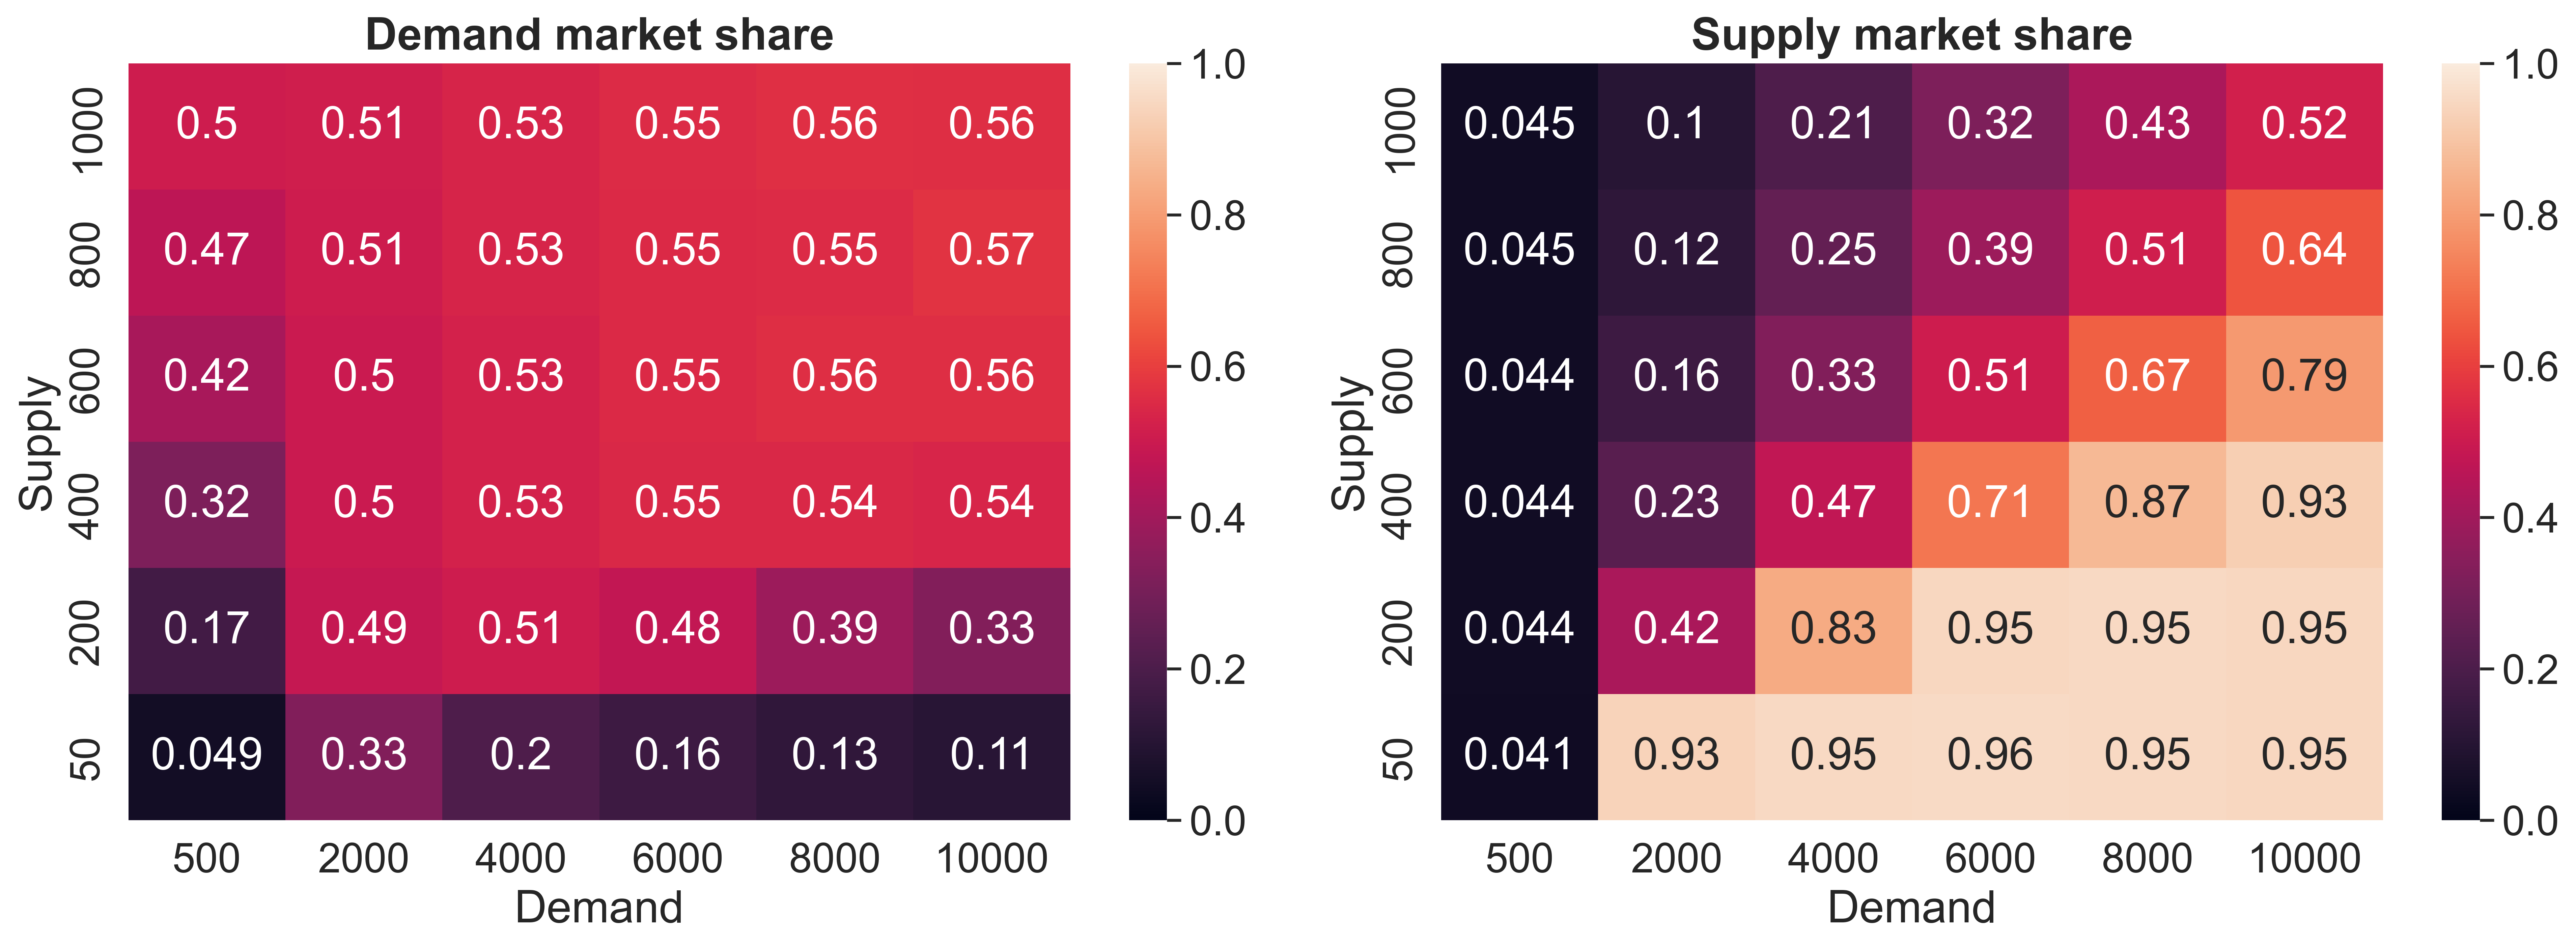

In [150]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1.6)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('white')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

sns.heatmap(np_arr, vmin=0, vmax=1, annot=True, ax=ax[0]) #, cmap='hls'
sns.heatmap(nv_arr, vmin=0, vmax=1, annot=True, ax=ax[1]) #, cmap='hls'


ax[0].set(xlabel='Demand', ylabel='Supply', ylim=(0,6), xticklabels=npl, yticklabels=nvl)
ax[1].set(xlabel='Demand', ylabel='Supply',ylim=(0,6), xticklabels=npl, yticklabels=nvl)

ax[0].set_title('Demand market share',fontweight='bold')
ax[1].set_title('Supply market share',fontweight='bold')

plt.tight_layout()

In [164]:
p_wt = []; v_prof = []

for nV in nvl:
    lp = []; lv = []
    for nP in npl:
        # print(nV,'  ', nP)
        dfp = pd.read_csv('data/dataframes/matrix/baseline_demand_{}d_{}p.csv'.format(nV,nP))
        wt = dfp.ACTUAL_WT[len(dfp)-100:].mean()
        lp.append(wt)
        # print(demand_share)
        
        dfv = pd.read_csv('data/dataframes/matrix/baseline_supply_{}d_{}p.csv'.format(nV,nP))
        prof = dfv.ACTUAL_INC[len(dfv)-100:].mean()
        lv.append(prof)
    p_wt.append(lp)
    v_prof.append(lv)

wt_arr = np.array(p_wt)
prof_arr = np.array(v_prof)

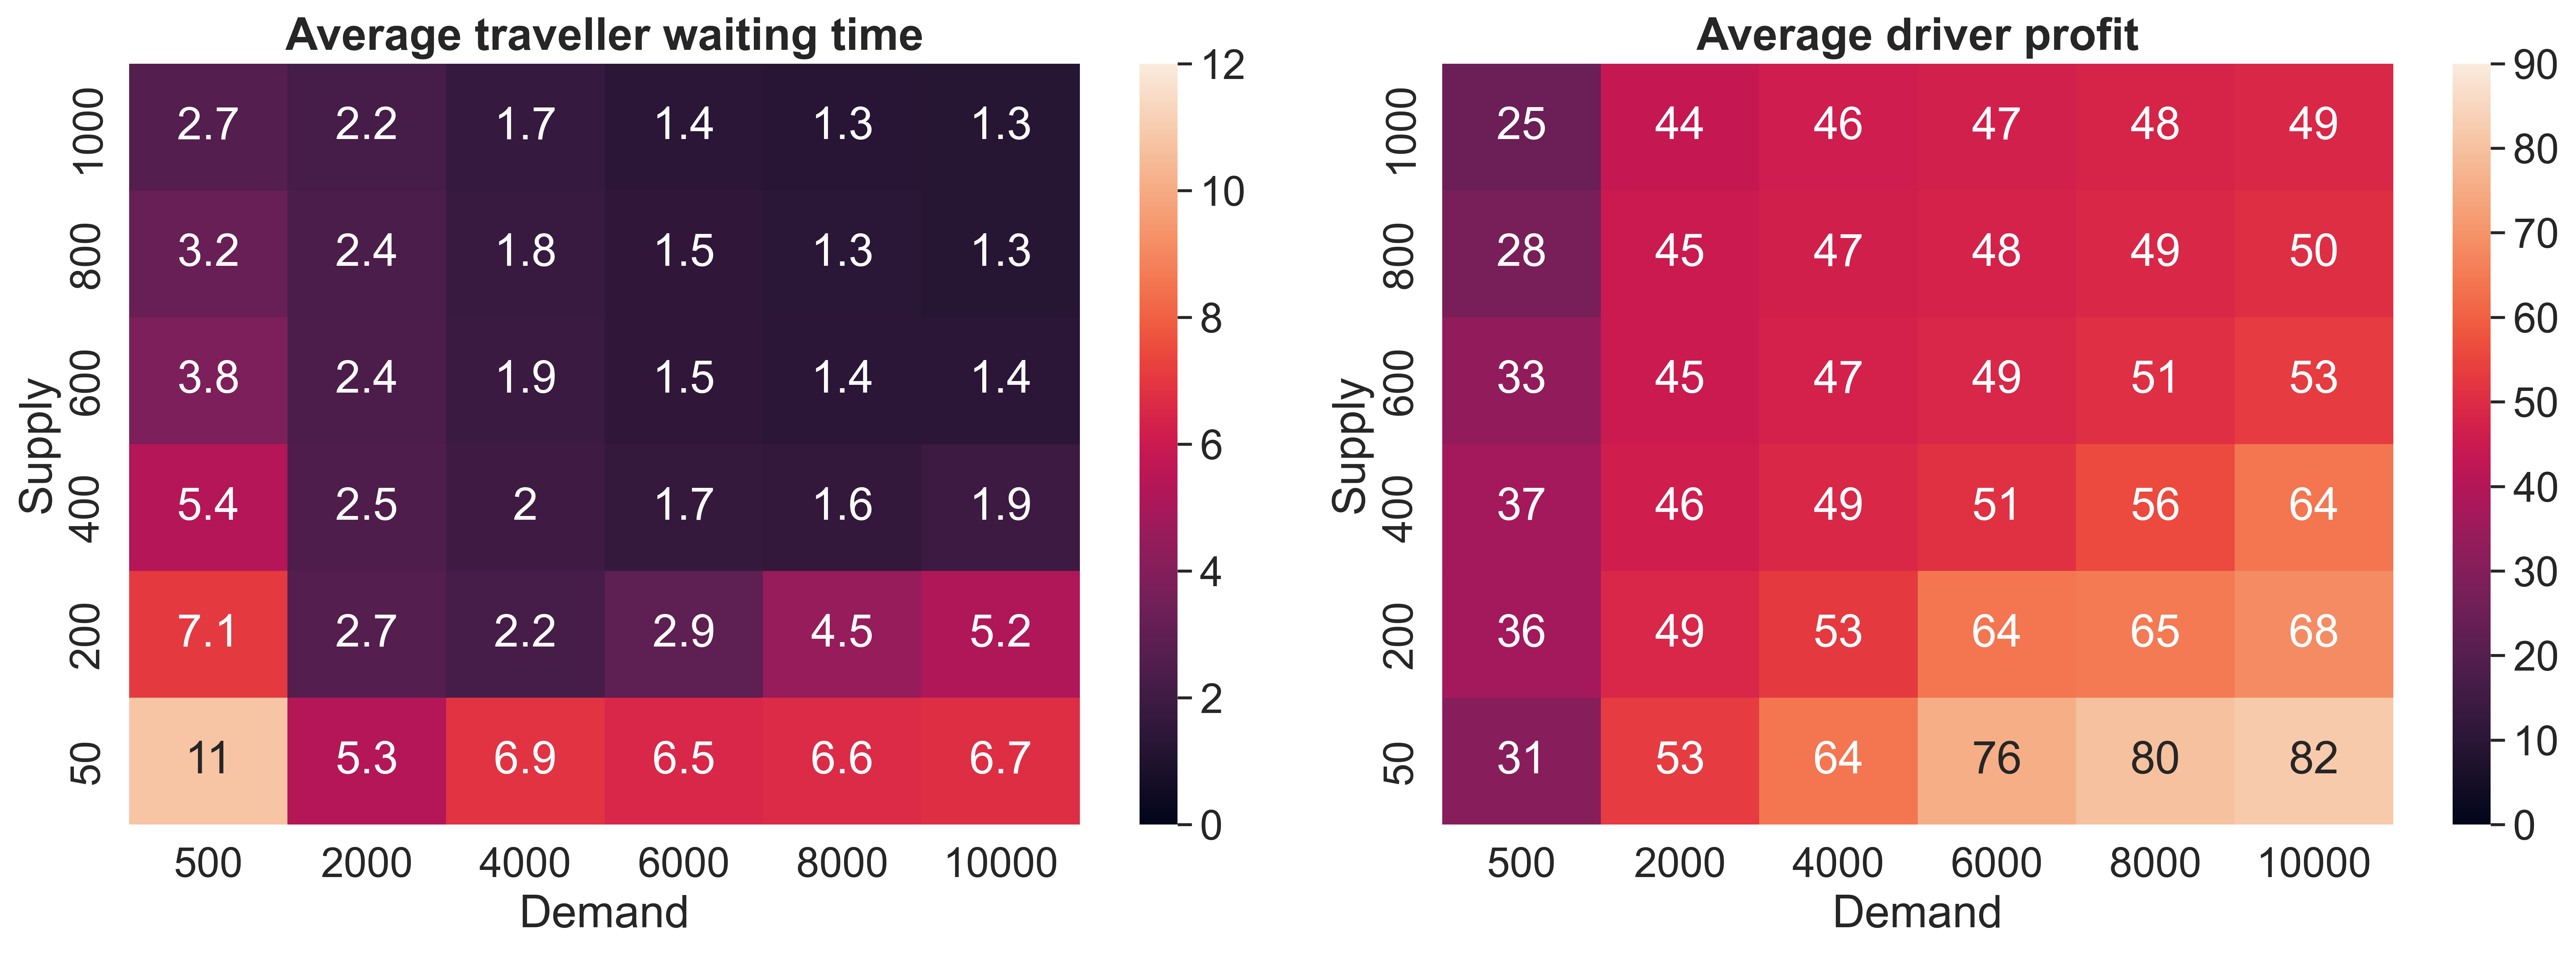

In [170]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1.6)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('white')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

sns.heatmap(wt_arr, vmin=0, vmax=12, annot=True, ax=ax[0]) #, cmap='hls'
sns.heatmap(prof_arr, vmin=0, vmax=90, annot=True, ax=ax[1]) #, cmap='hls'


ax[0].set(xlabel='Demand', ylabel='Supply', ylim=(0,6), xticklabels=npl, yticklabels=nvl)
ax[1].set(xlabel='Demand', ylabel='Supply',ylim=(0,6), xticklabels=npl, yticklabels=nvl)

ax[0].set_title('Average traveller waiting time',fontweight='bold')
ax[1].set_title('Average driver profit',fontweight='bold')

plt.tight_layout()

In [ ]:
p_wt = []; v_prof = []

for nV in nvl:
    lp = []; lv = []
    for nP in npl:
        # print(nV,'  ', nP)
        dfp = pd.read_csv('data/dataframes/matrix/baseline_demand_{}d_{}p.csv'.format(nV,nP))
        wt = dfp.MATCHING_T[len(dfp)-100:].mean()
        lp.append(wt)
        
        
        dfv = pd.read_csv('data/dataframes/matrix/baseline_supply_{}d_{}p.csv'.format(50,500))
        dfv.ARRIVES_AT_PICKUP/(dfv.nRIDES*60)
        prof = dfp.ARRIVES_AT_PICKUP/(dfp.nRIDES*60)[len(dfp2)-100:].mean()
        lv.append(prof)
    p_wt.append(lp)
    v_prof.append(lv)

wt_arr = np.array(p_wt)
prof_arr = np.array(v_prof)

In [183]:
dfv = pd.read_csv('data/dataframes/matrix/baseline_supply_{}d_{}p.csv'.format(50,500))
dfv.ARRIVES_AT_PICKUP/(dfv.nRIDES*60).iloc[200]#.mean()

0            NaN
1       3.536364
2            NaN
3       5.406818
4       4.770455
         ...    
795    16.120455
796    12.445455
797     8.527273
798     5.846023
799    14.859091
Name: ARRIVES_AT_PICKUP, Length: 800, dtype: float64